# Import
Make sure both FocusFeedbackAnalysis and FocusFeedbackGUI are installed

In [1]:
from focusfeedbackanalysis.track_analysis import TrackAnalysis
from ndbioimage import Imread
from matplotlib import pyplot as plt

In [2]:
file = '/DATA/lenstra_lab/w.pomp/data/20200509/YTL639_2020_05_09__12_40_46.czi'

# Visualize the contents of the time-lapse
Figure out which channels contain what  
Check metadata (time interval, pixel size)

In [3]:
im = Imread(file)

In [4]:
im

path/filename: /DATA/lenstra_lab/w.pomp/data/20200509/YTL639_2020_05_09__12_40_46.czi
series/pos:    0
reader:        cziread
dtype:         uint16
shape (ctyx):  2 x 1200 x 256 x 256
pixel size:    97.09 nm
exposuretime:  0.10 s
time interval: 1.002 s
binning:       1x1
laser colors:  642 | 488 nm
laser powers:  0.04 | 0.001 %
objective:     alpha Plan-Apochromat 100x/1.57 Oil-HI DIC Korr M27 Elyra
magnification: 160.0x
tubelens:      Lens 1,6x
filterset:     ['LBF 405/488/642', 'LBF 405/488/642']
gain:          100 100

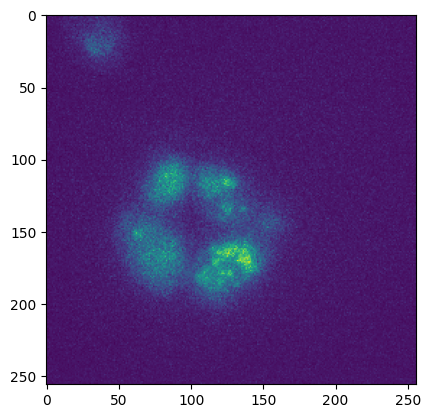

In [5]:
plt.imshow(im[0, 0])

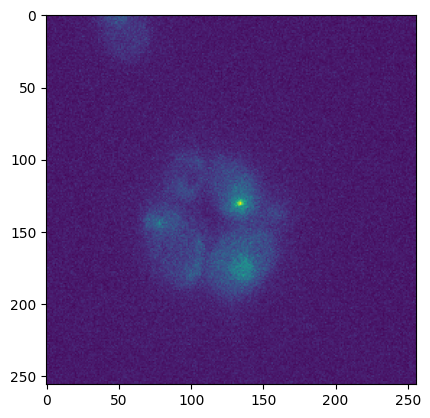

In [6]:
plt.imshow(im[1, 0])

# Start tracking pipeline for the time lapse
The first argument (image_file) is required, the rest is optional

In [7]:
print(TrackAnalysis.__doc__)


    Analyze a time-lapse to construct tracks. A track is constructed on
    the locations of a label (particle in the label channel) in each
    frame. If the label (or label channel) is absent, the track is
    constructed from the particle in the main channel. Particles in the
    single molecule (sm) channel are localized on or around the location
    of the label of main track.

    If not done already for a previous analysis, the analysis will start
    with performing a calibration using z-stacks with beads. The argument
    'bead_files' can be used to give the bead files to be used for the
    calibration. If not specified, files in the same folder as the image
    file starting with 'beads' will be used. The channel configuration of
    these z-stacks should be the same as for the image file on which the
    analysis will be done. The calibration is used to determine the angle
    theta of the ellipses to fit, for a correction on the intensity of
    out-of-focus ellipses, and

the calibration results in a lot of plots
1. max intensity projection with detected beads annotated
2. ellipticity orientation histogram
3. horizontal and vertical psf width vs $z$ for each detected bead
4. x psf width ($\sigma_x$) for all beads, centered at $z=0$, fitted with a red line
5. y psf width ($\sigma_y$) for all beads, centered at $z=0$, fitted with a red line
6. ellipticity ($\frac{\sigma_x}{\sigma_y}$) vs $z$ for all beads,  
    red line: ratio of red lines in previous two plots  
    green line: fit, parameters shown below

Frame 821: 1 trajectories present.


          0/1200

Refitting localisations:   0%|          | 0/868 [00:00<?, ?it/s]

/home/w.pomp/.local/lib/python3.12/site-packages/focusfeedbackgui/cylinderlens.py:65: RuntimeWarning: divide by zero encountered in scalar divide
  dz = np.sqrt((dell**2+s)/dedz**2)


Finding slave molecules:   0%|          | 0/1200 [00:00<?, ?it/s]

Saving frames:   0%|          | 0/1200 [00:00<?, ?it/s]

Fitting background.


Fitting background localisations:   0%|          | 0/9600 [00:00<?, ?it/s]

Write files


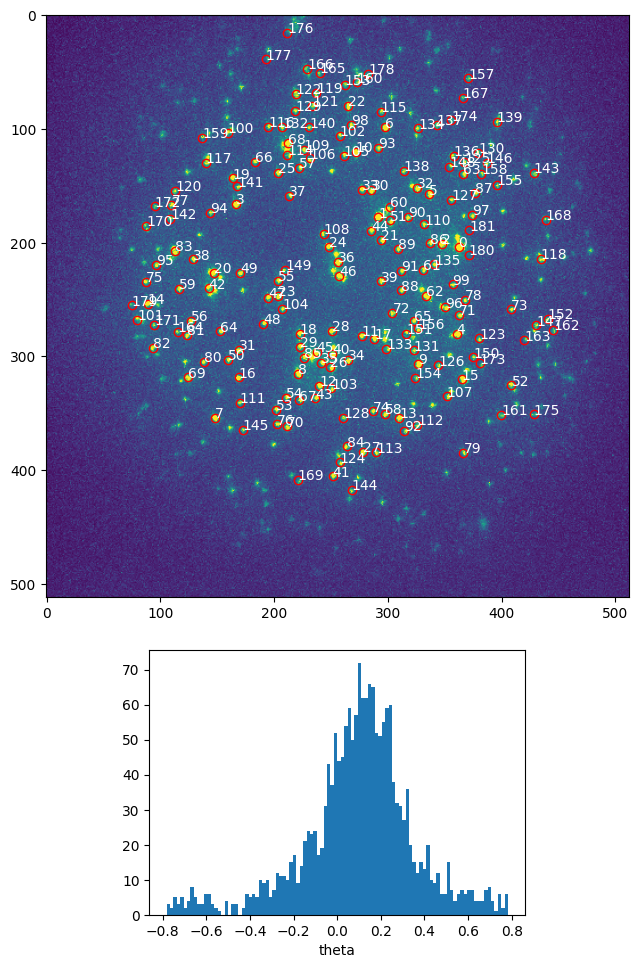

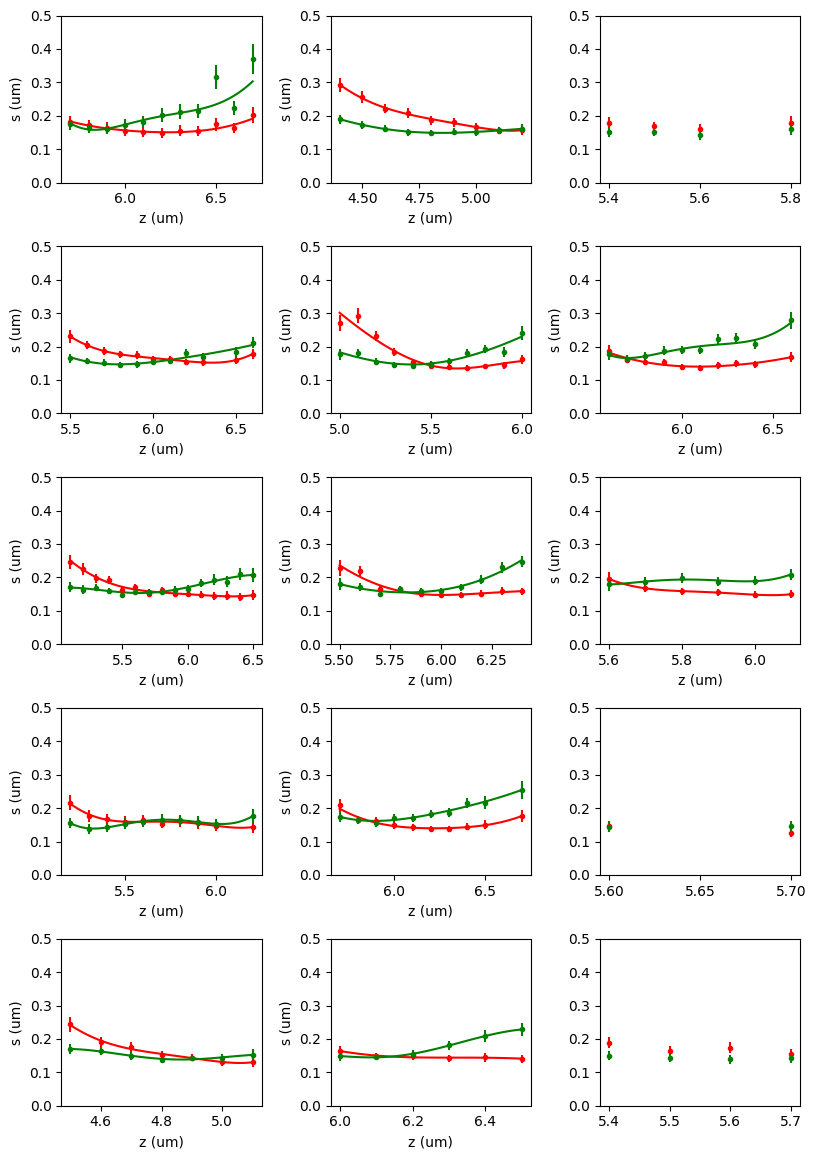

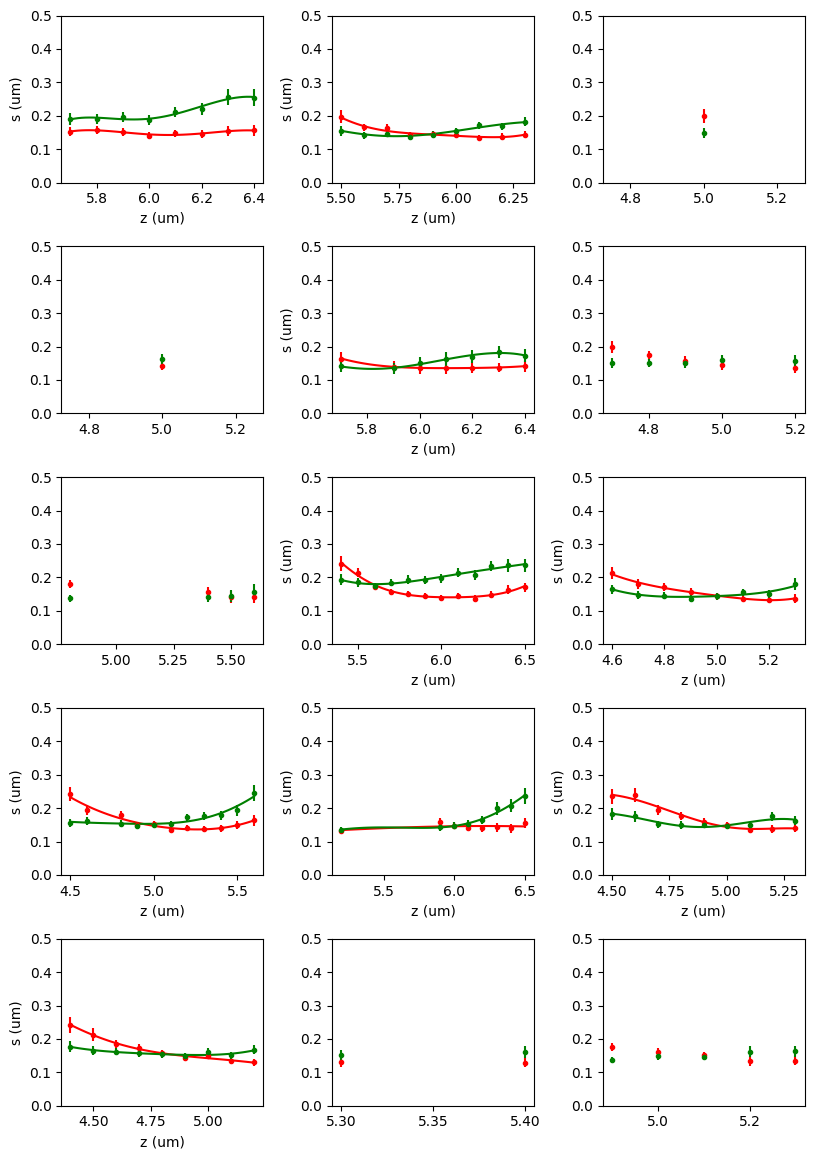

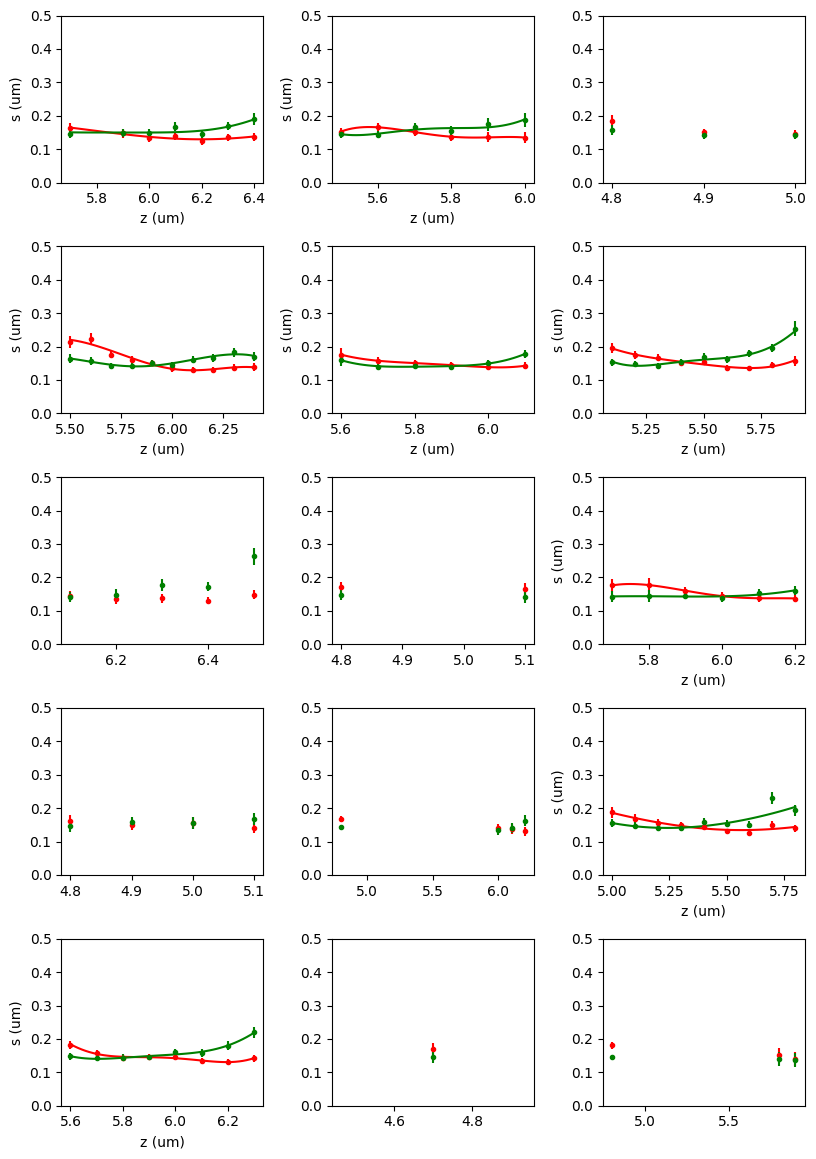

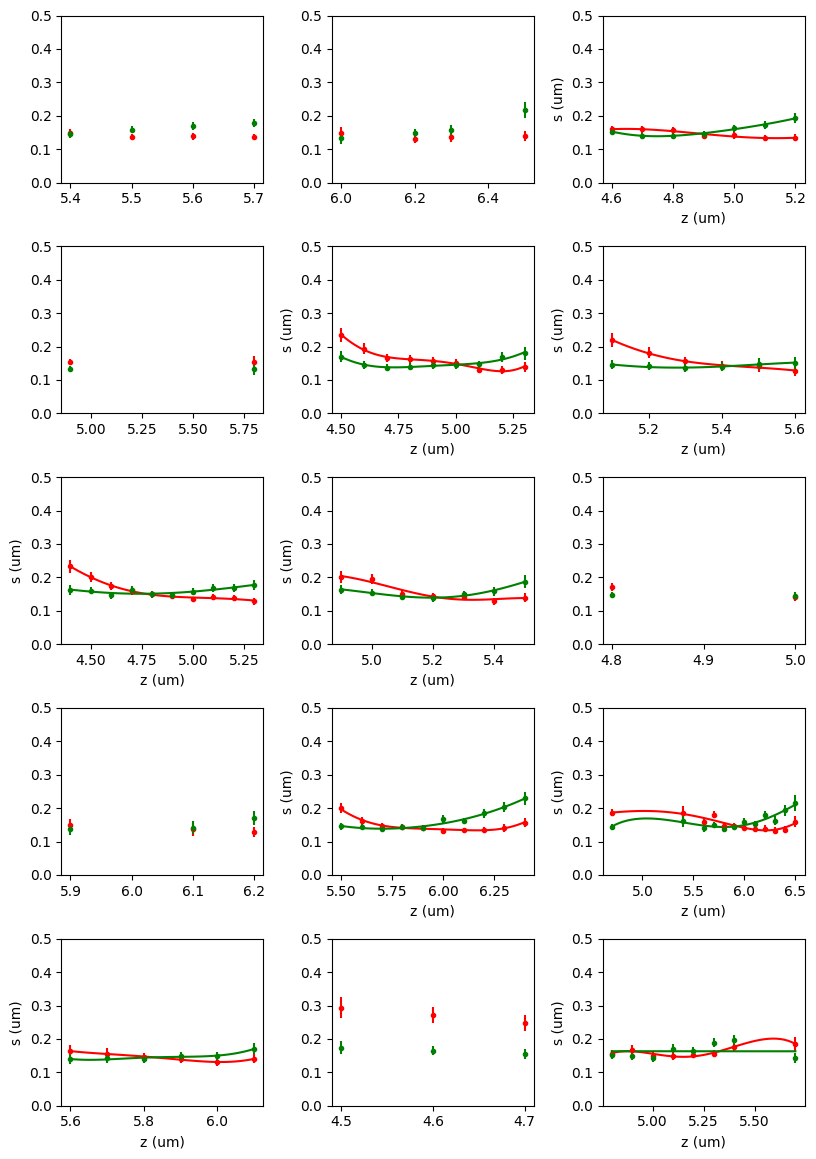

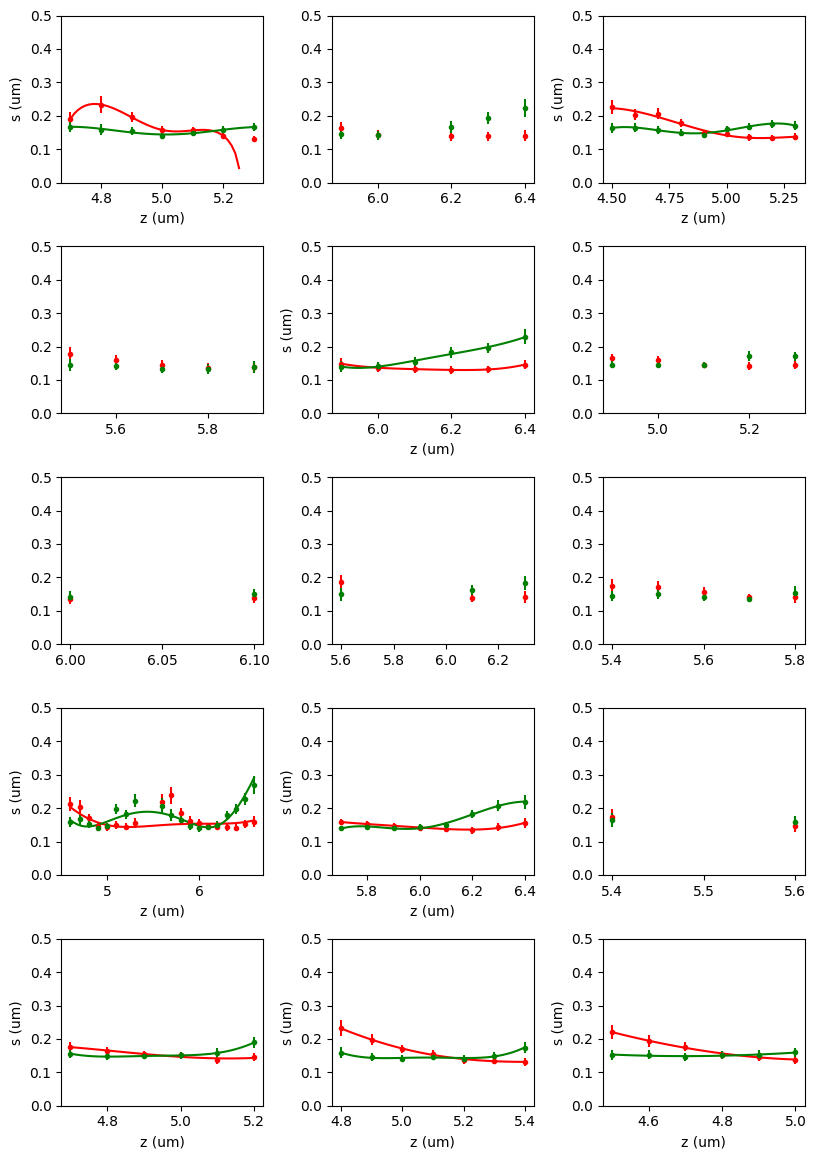

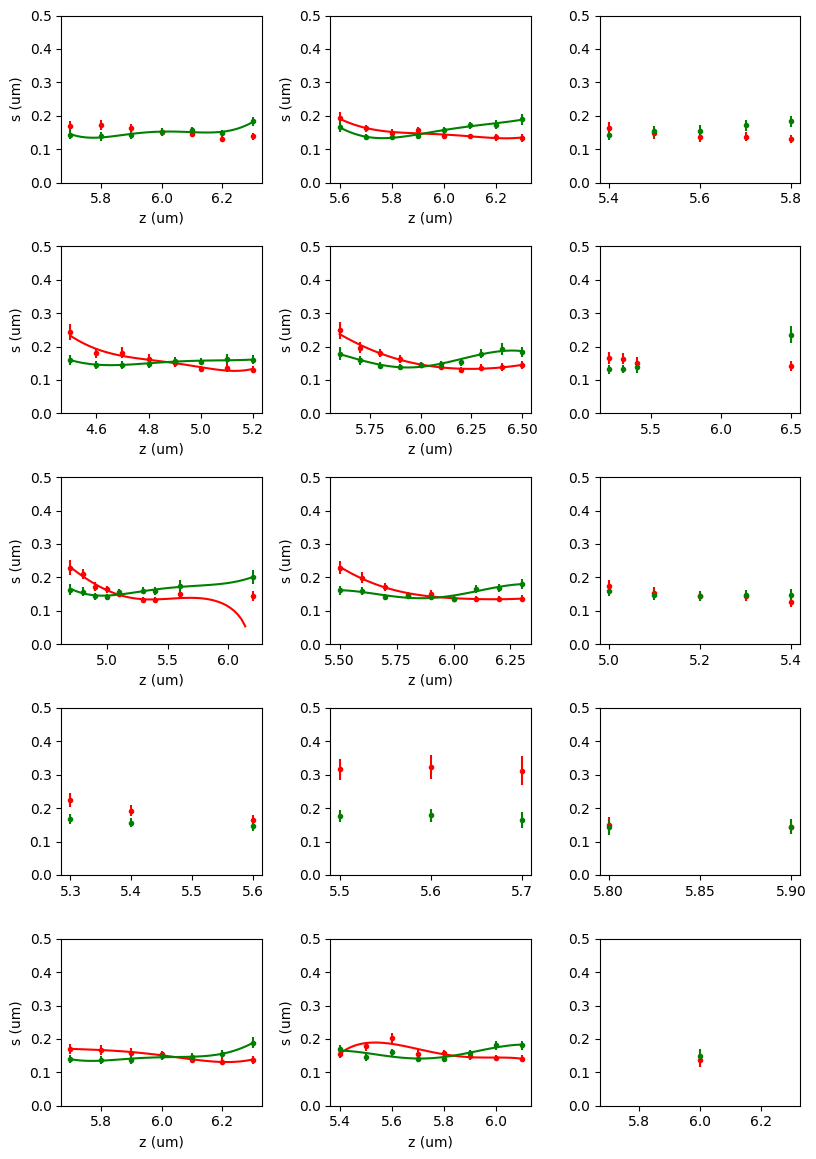

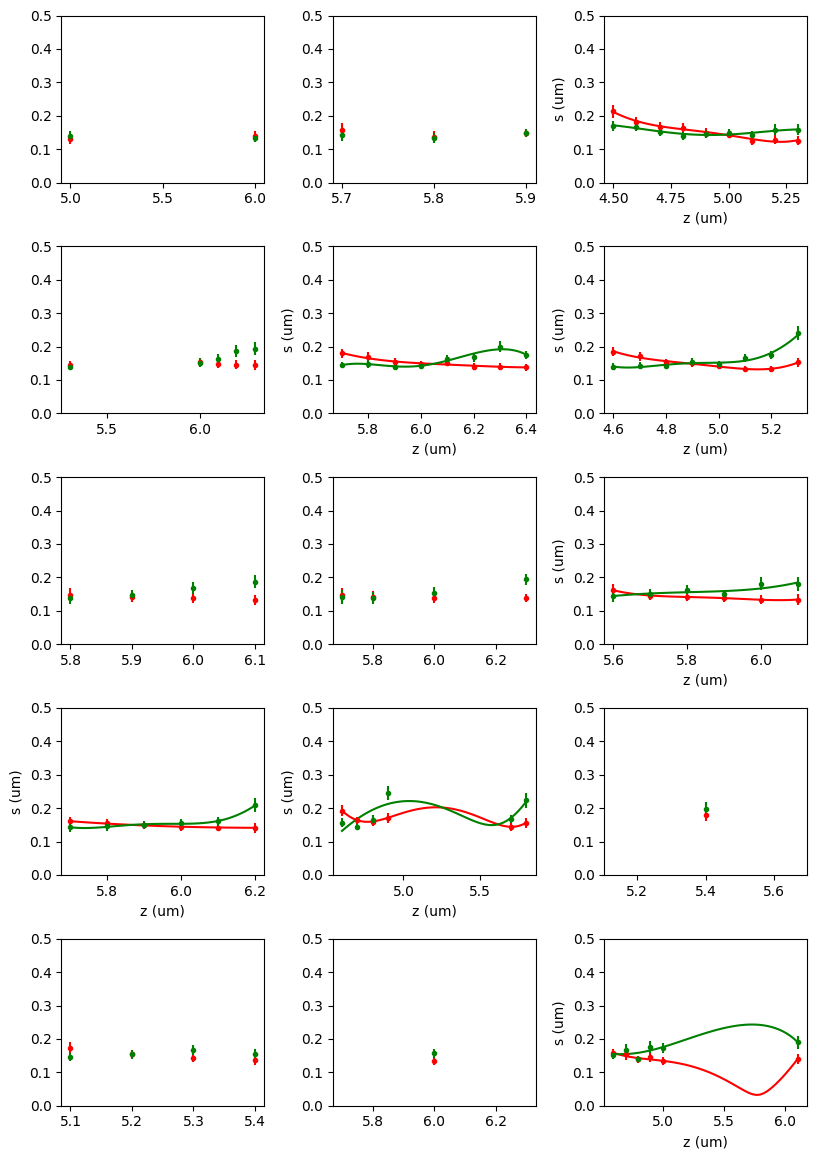

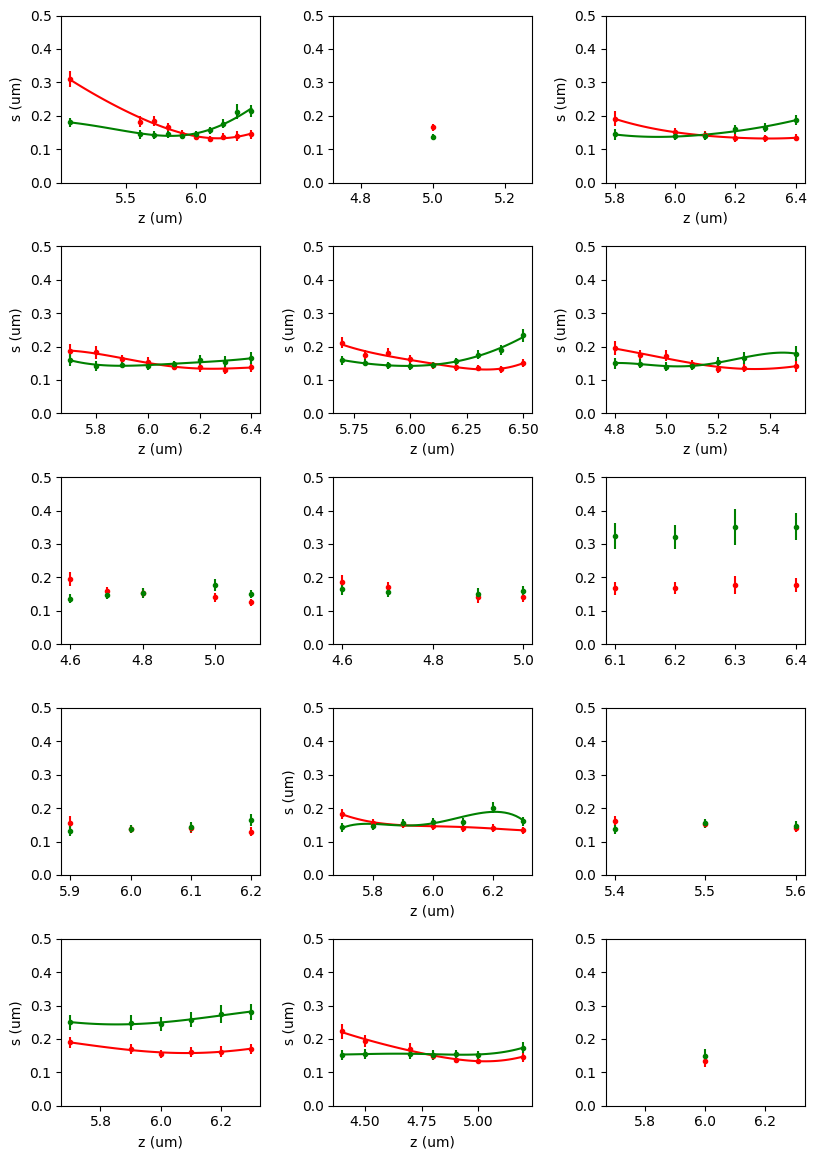

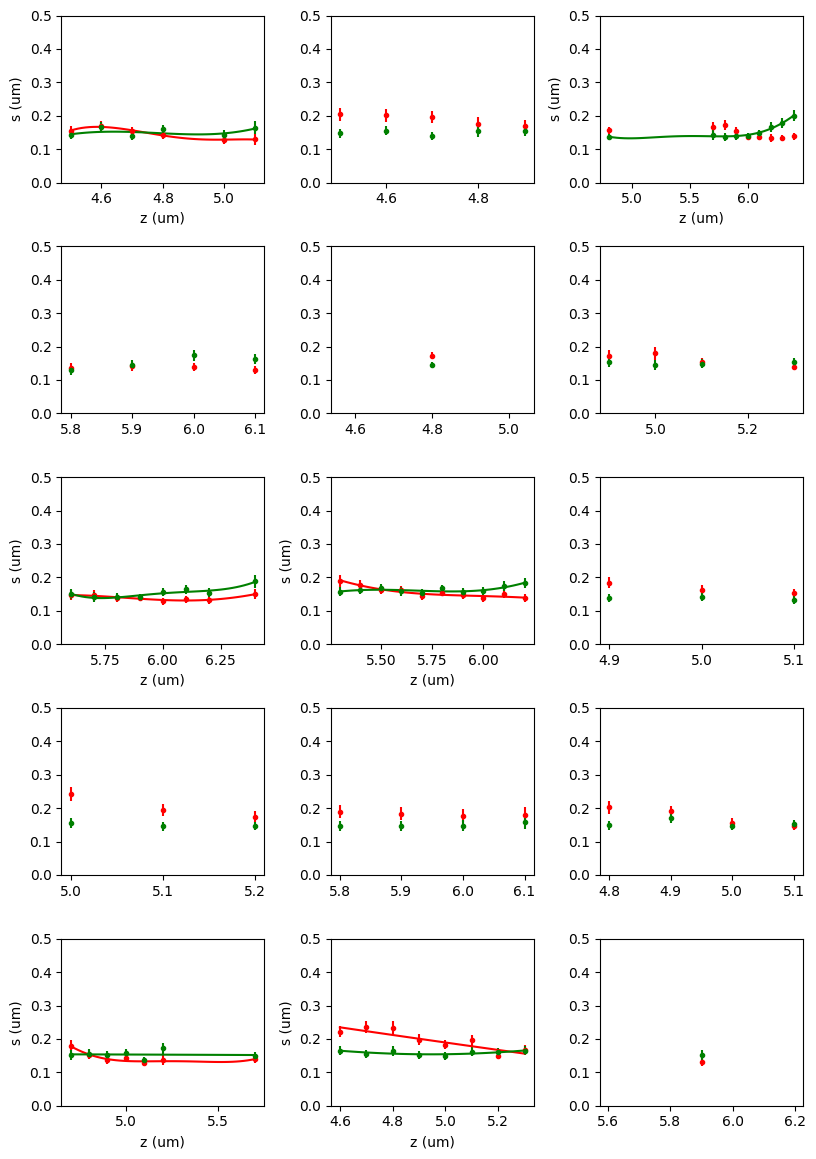

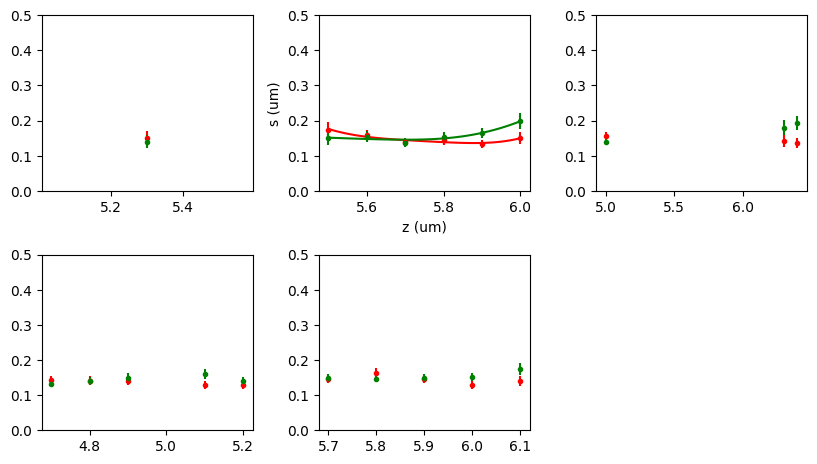

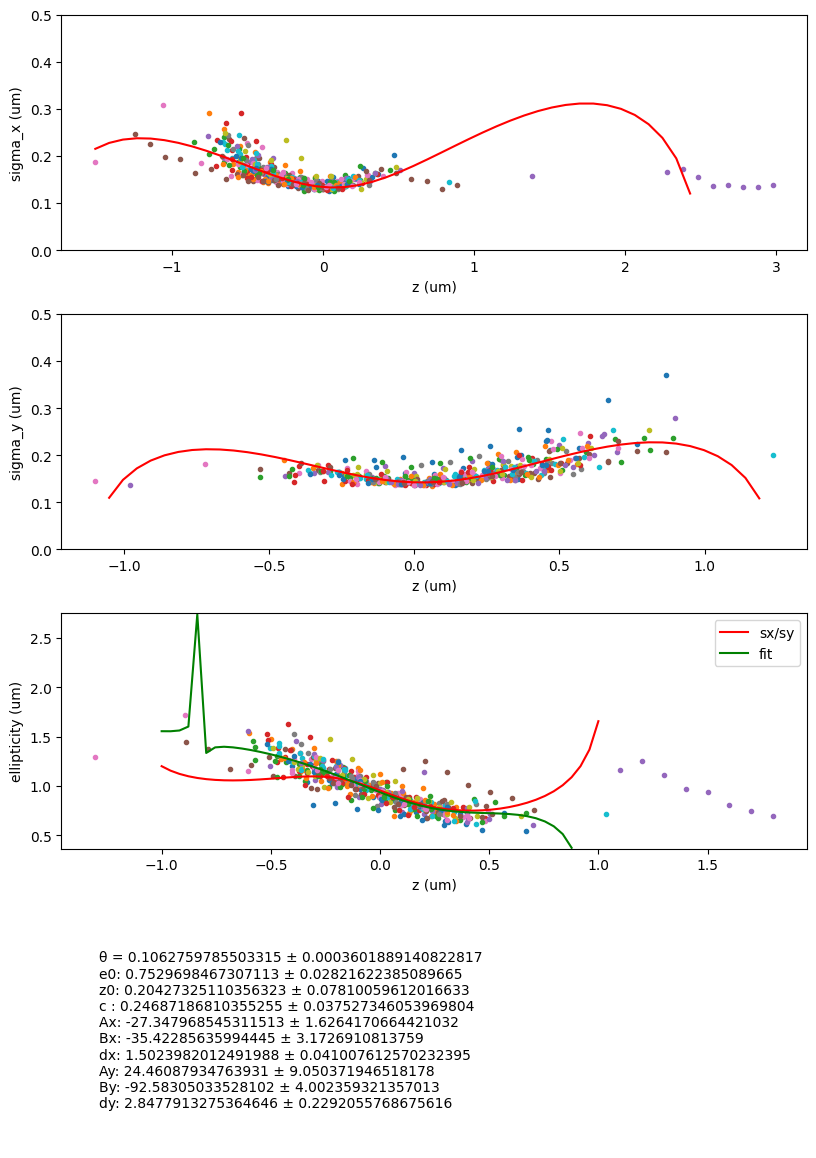

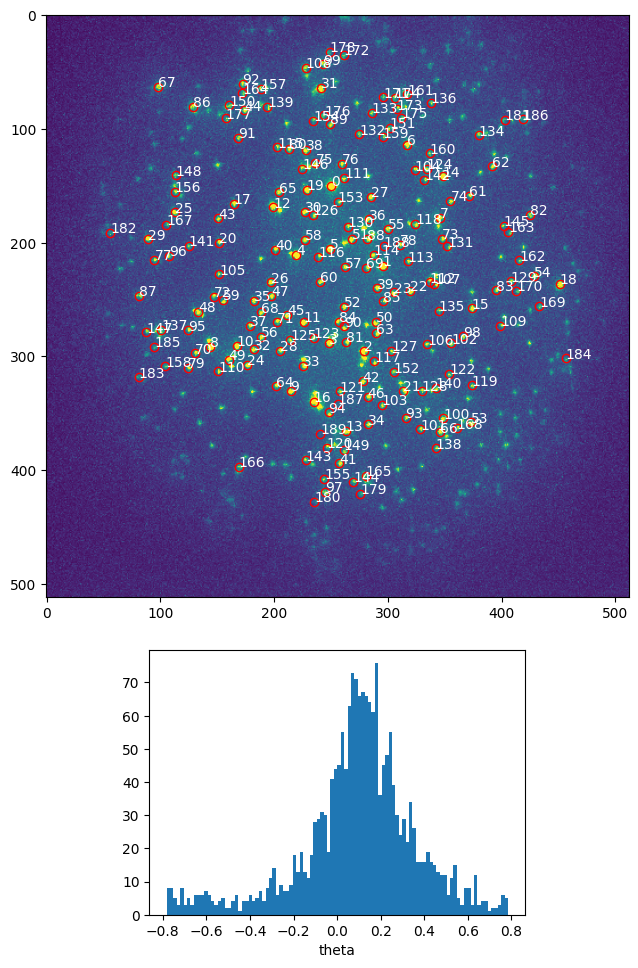

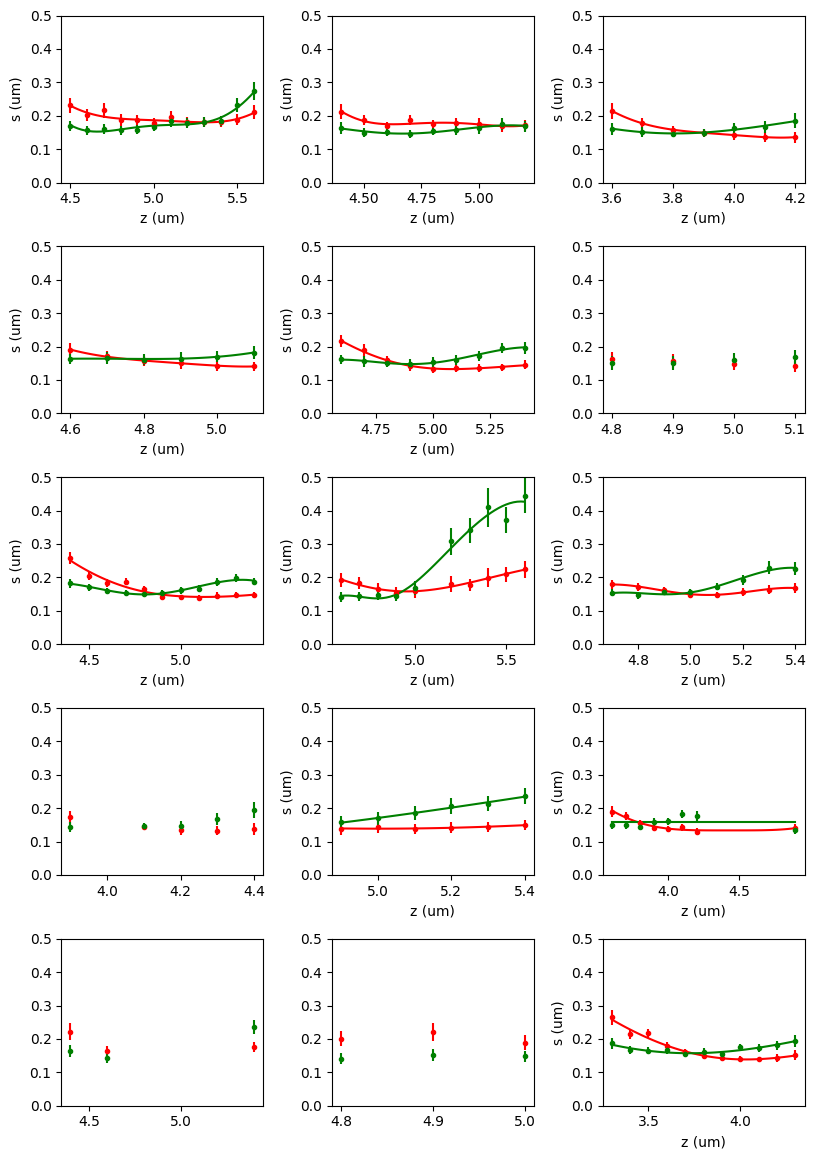

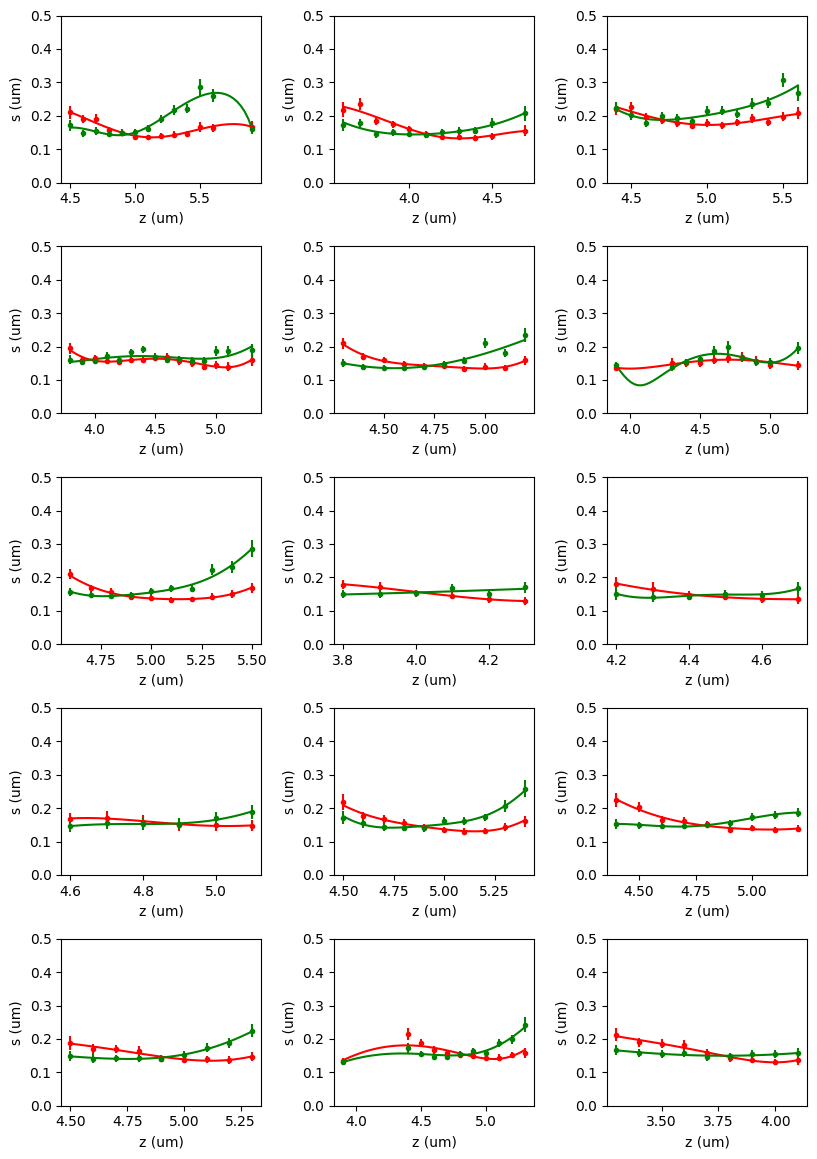

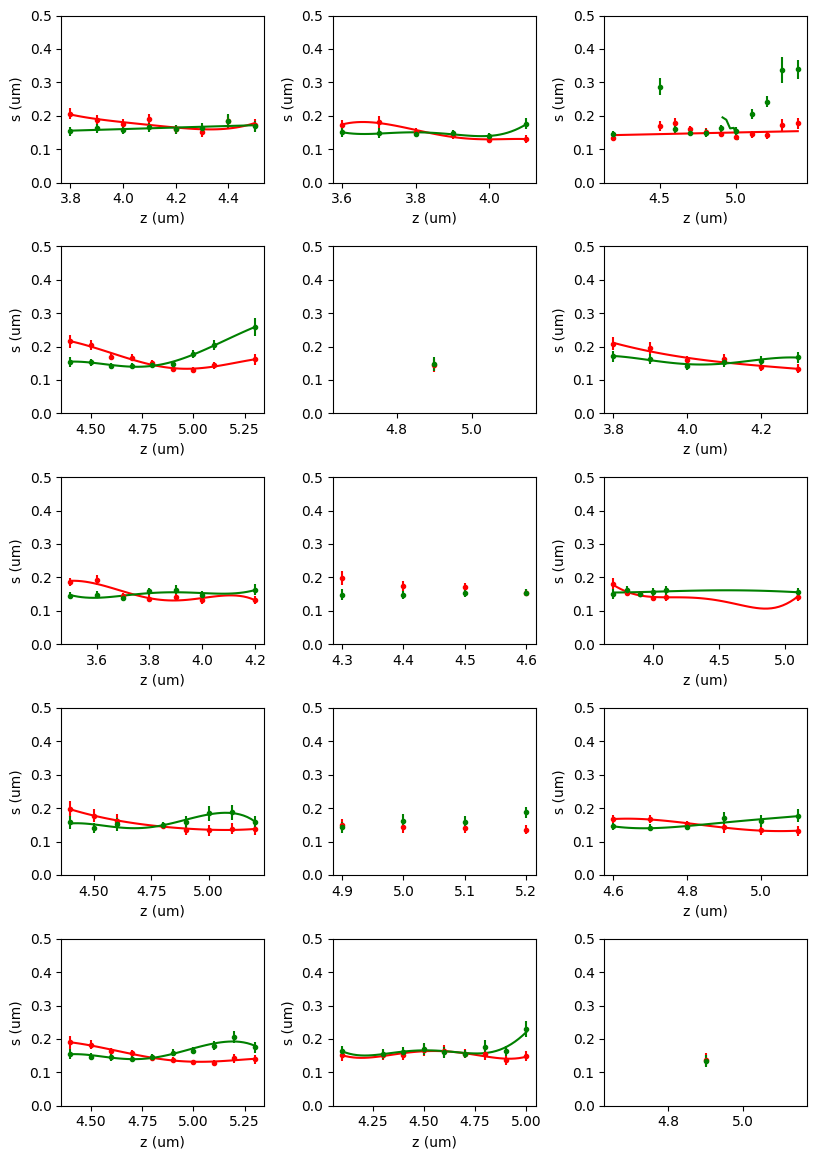

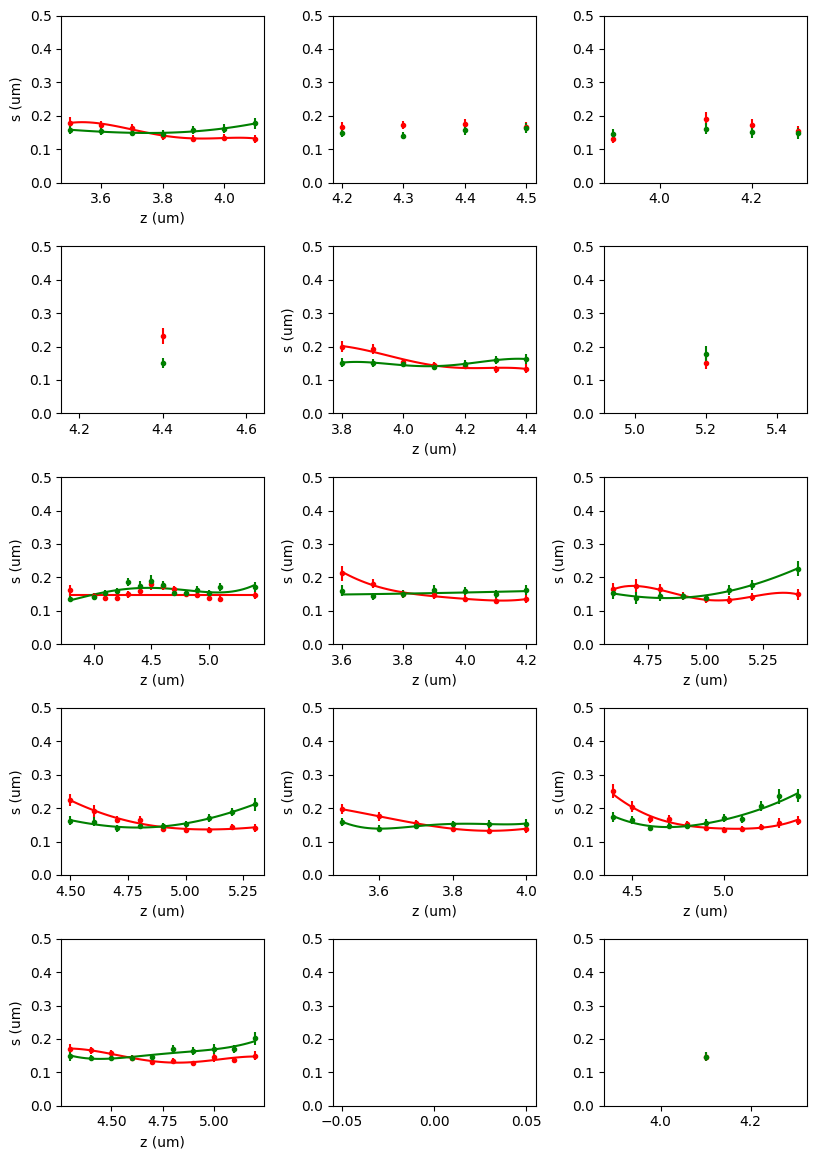

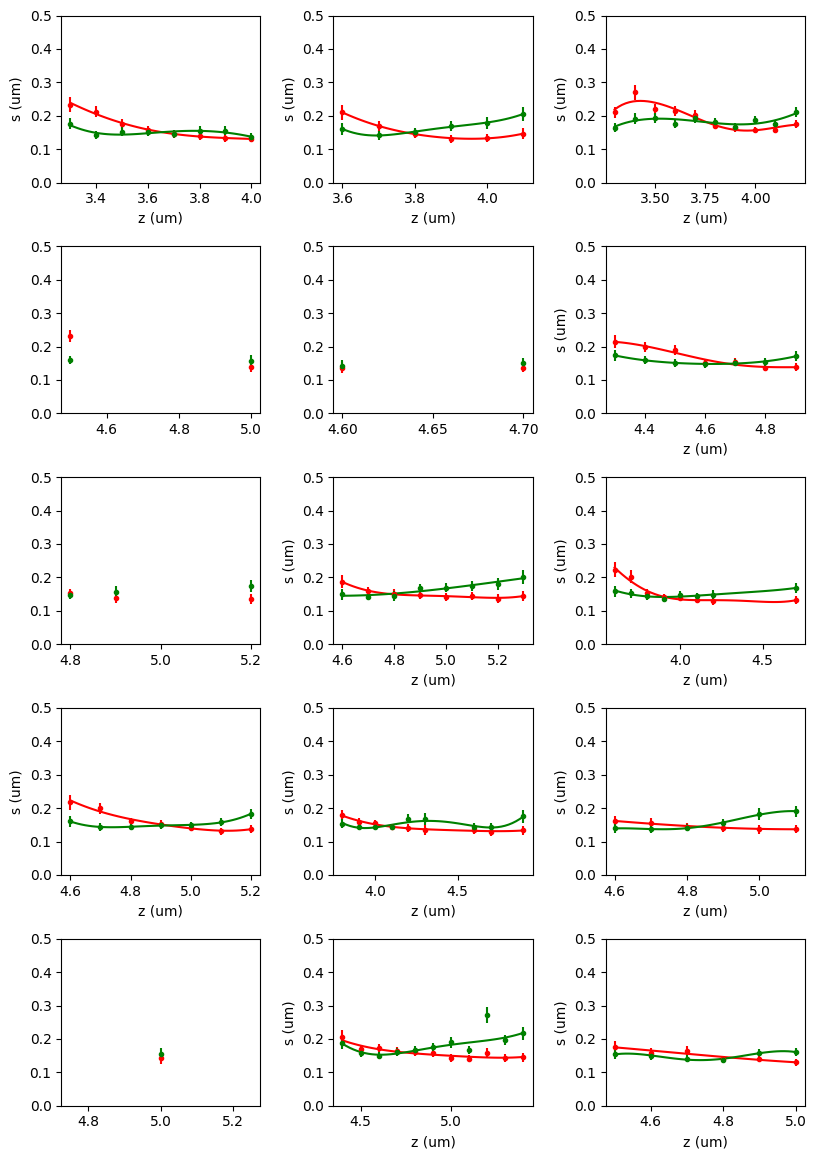

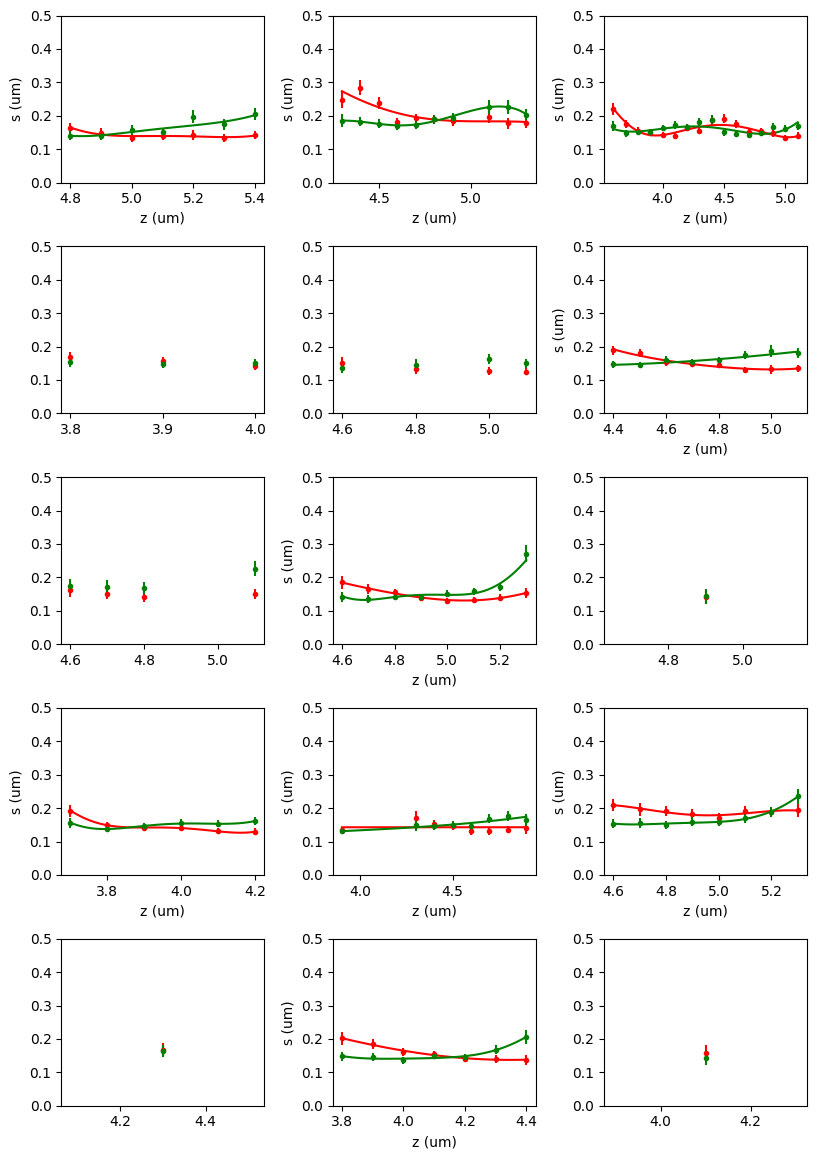

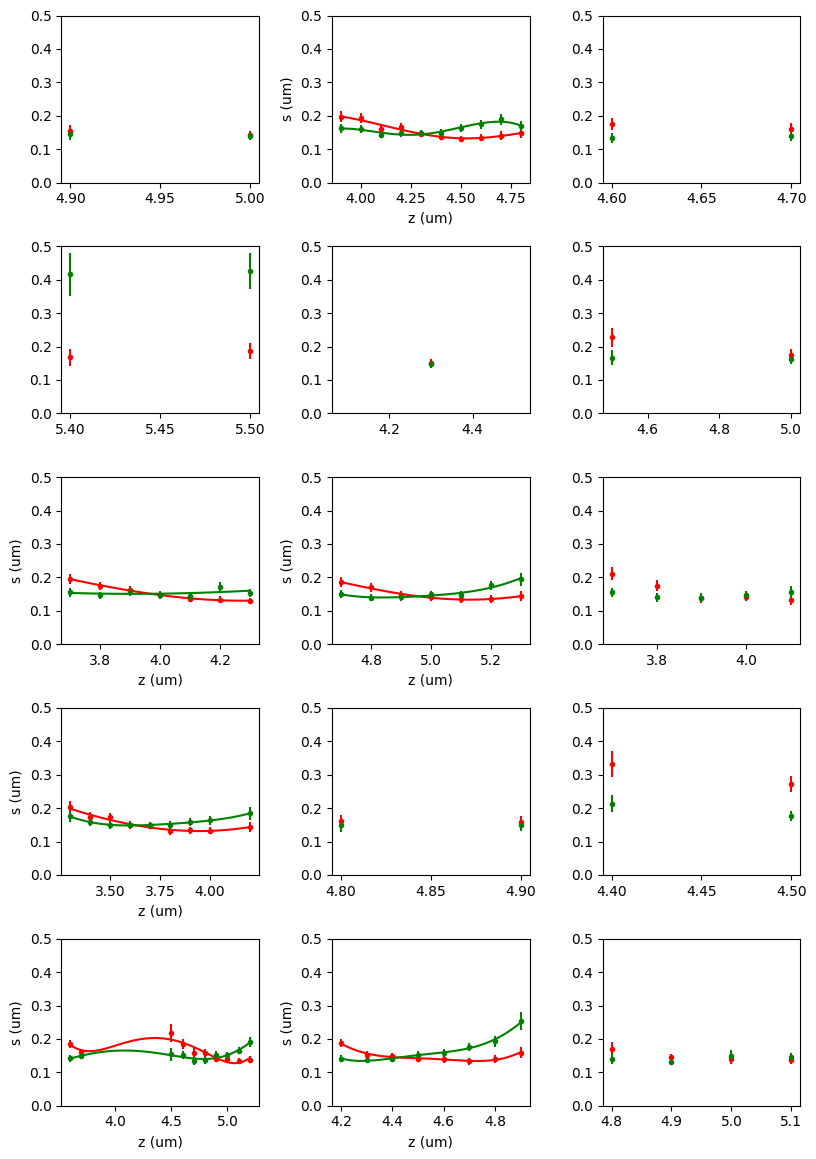

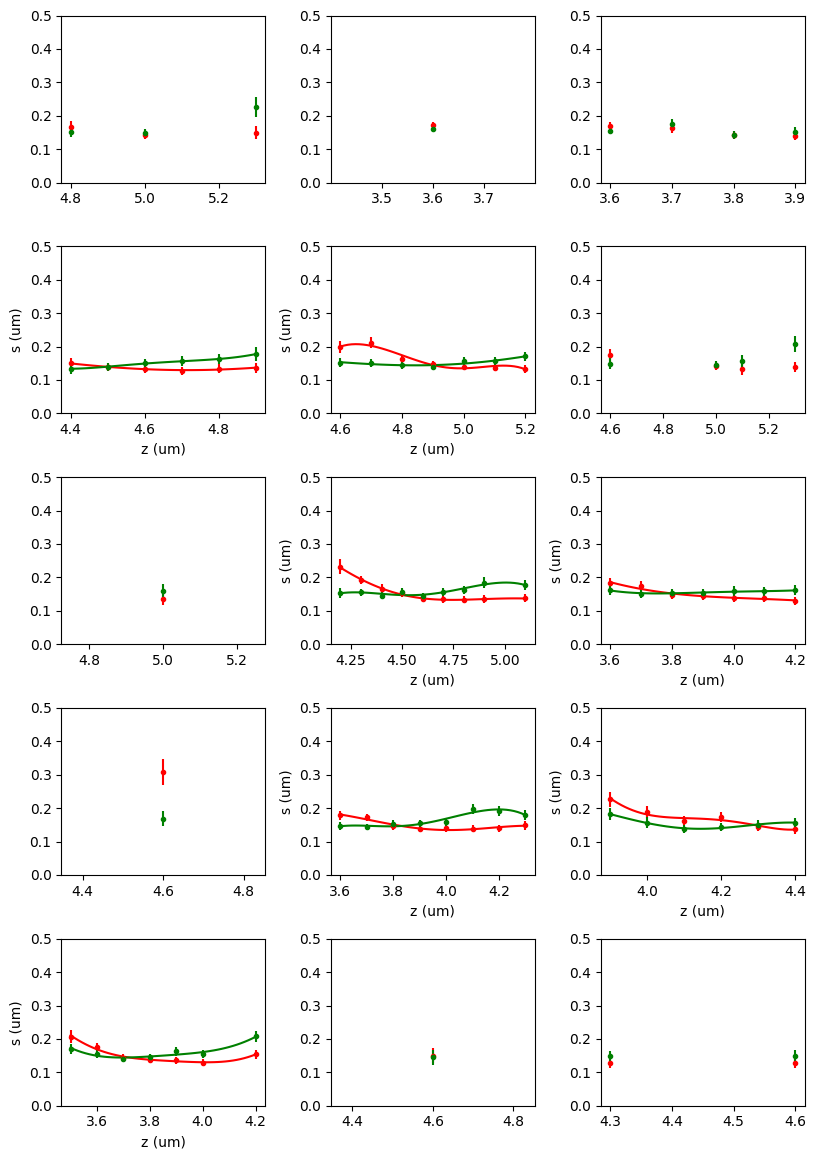

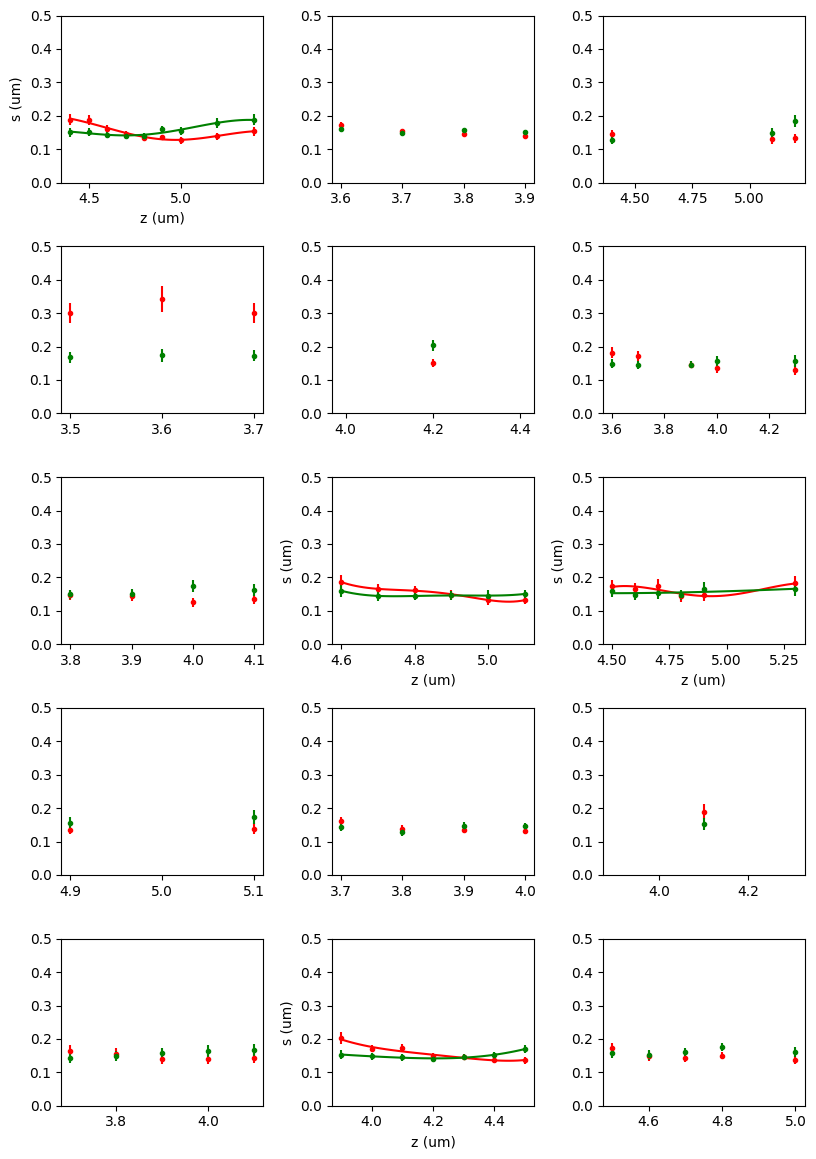

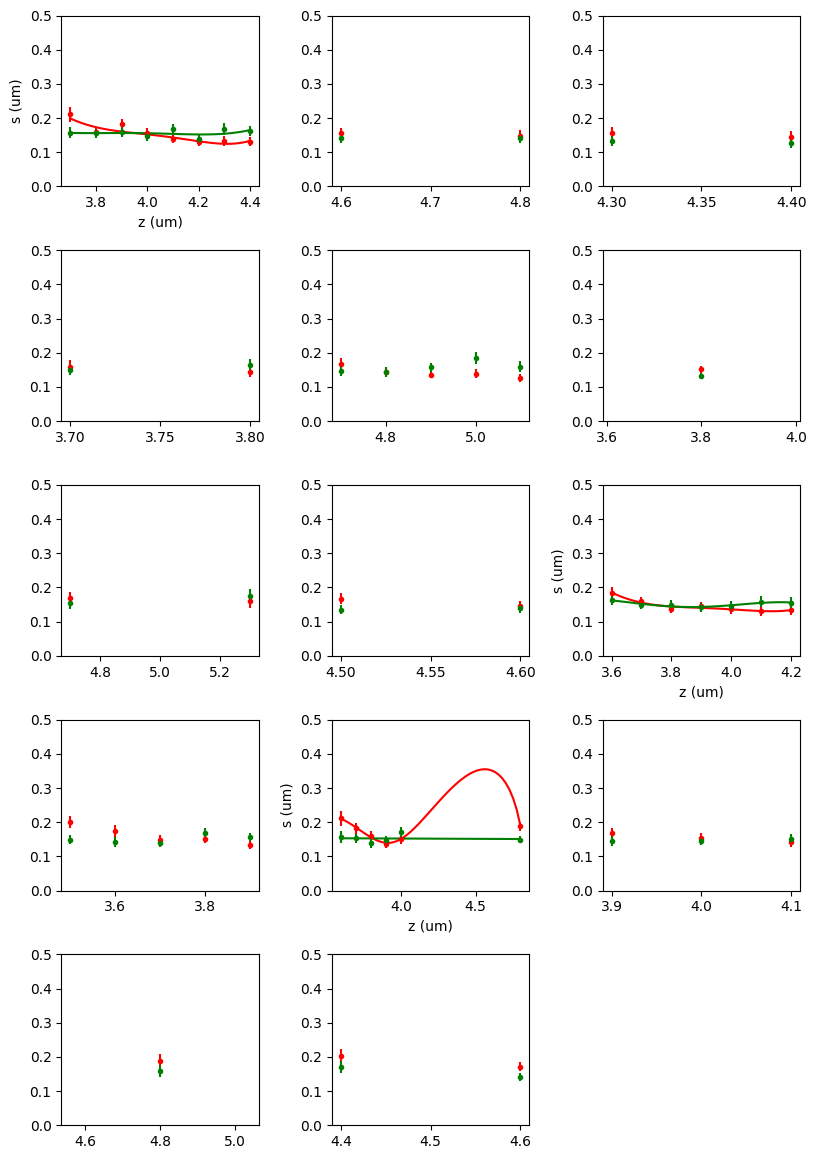

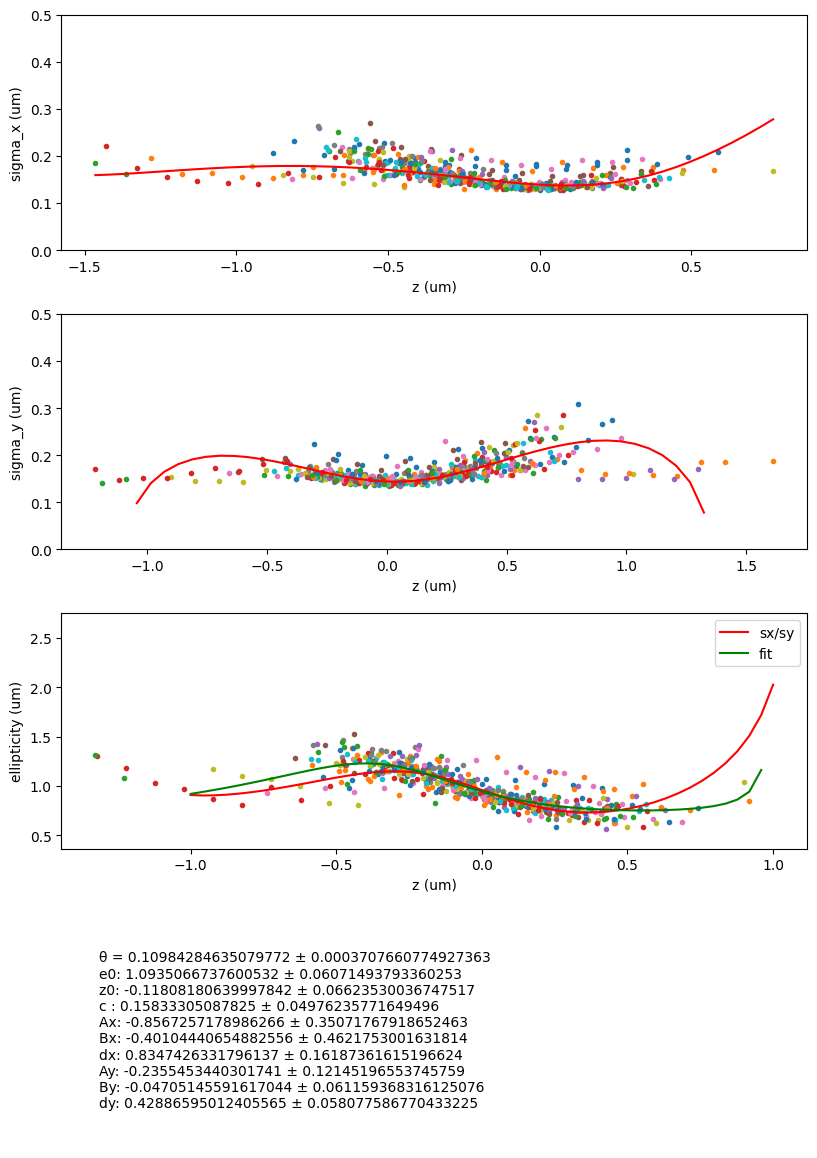

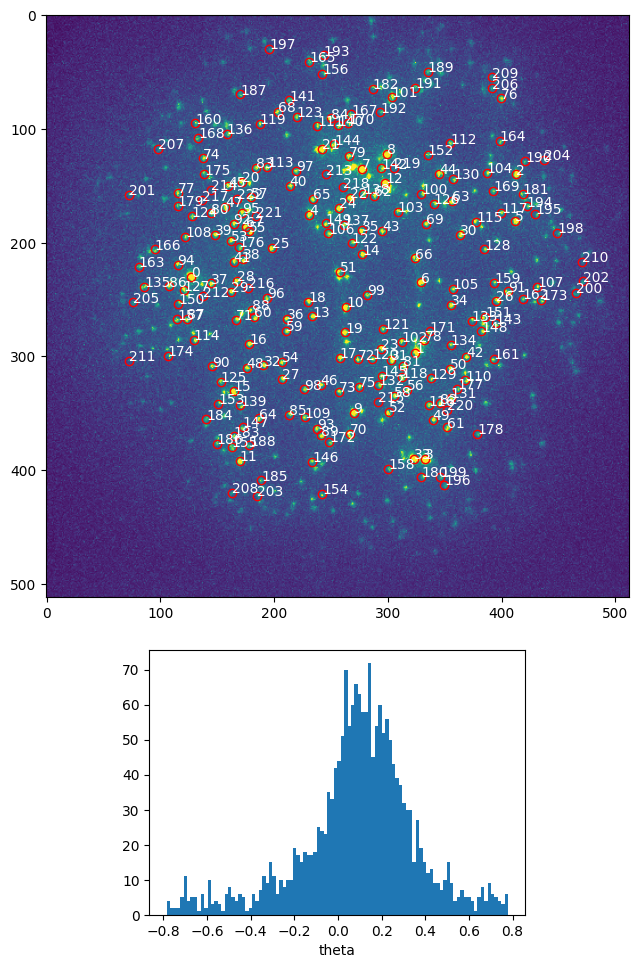

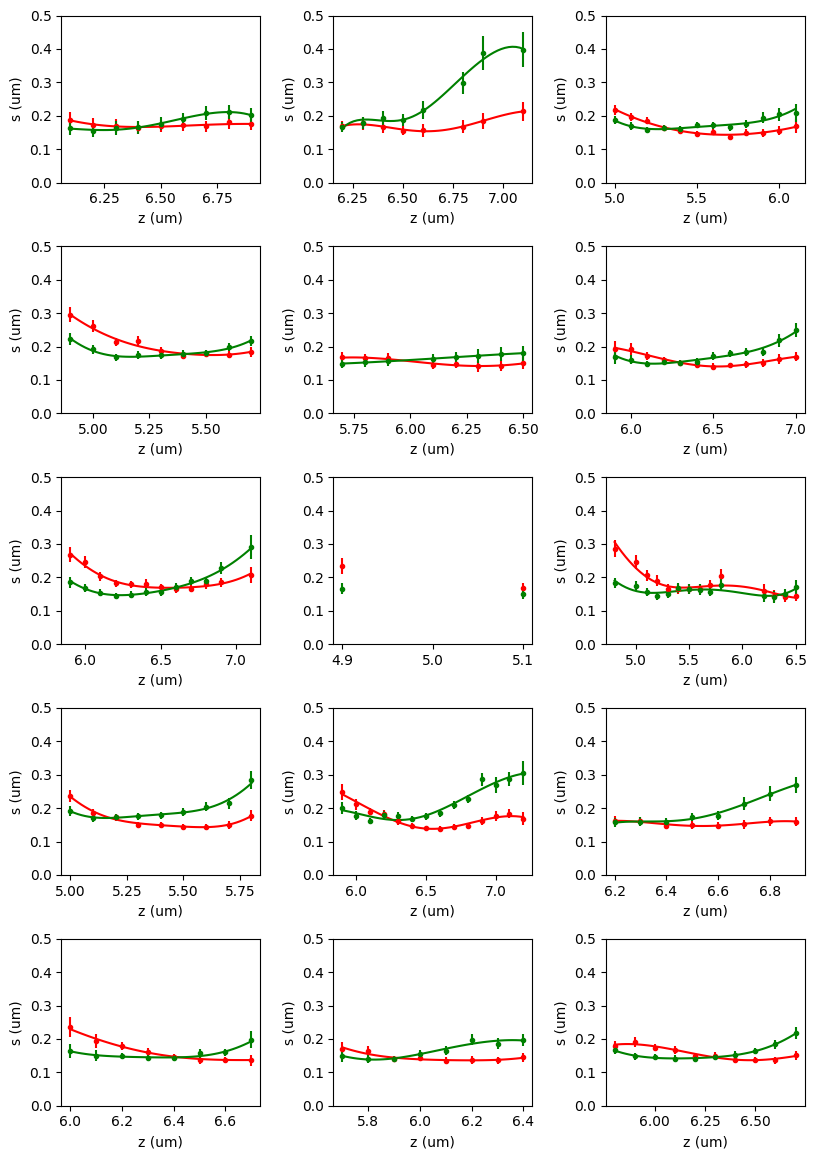

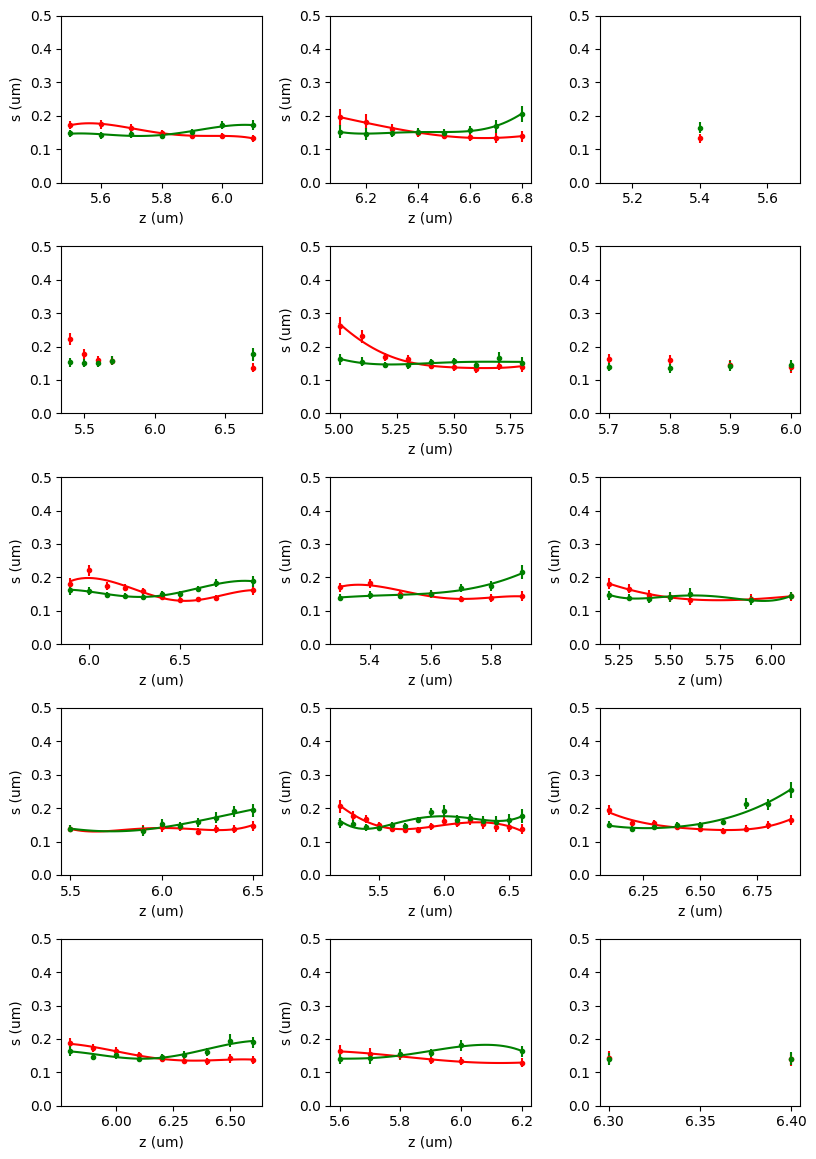

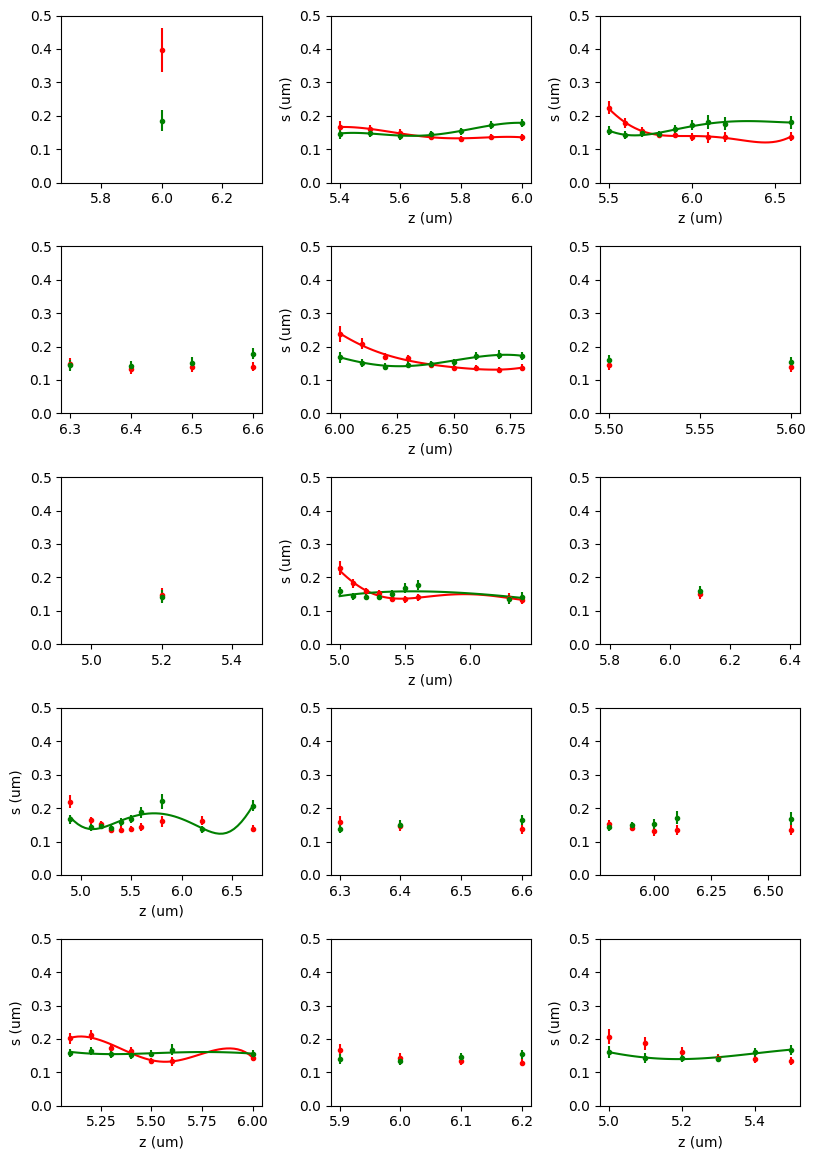

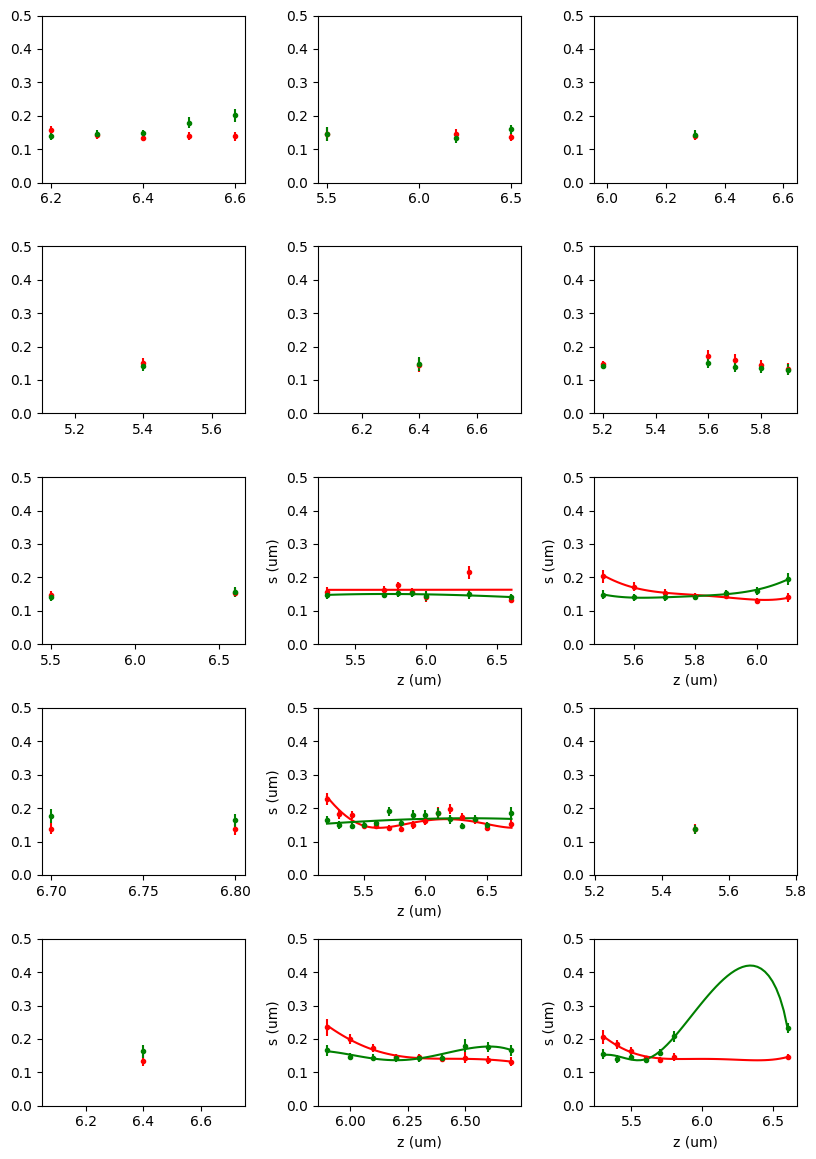

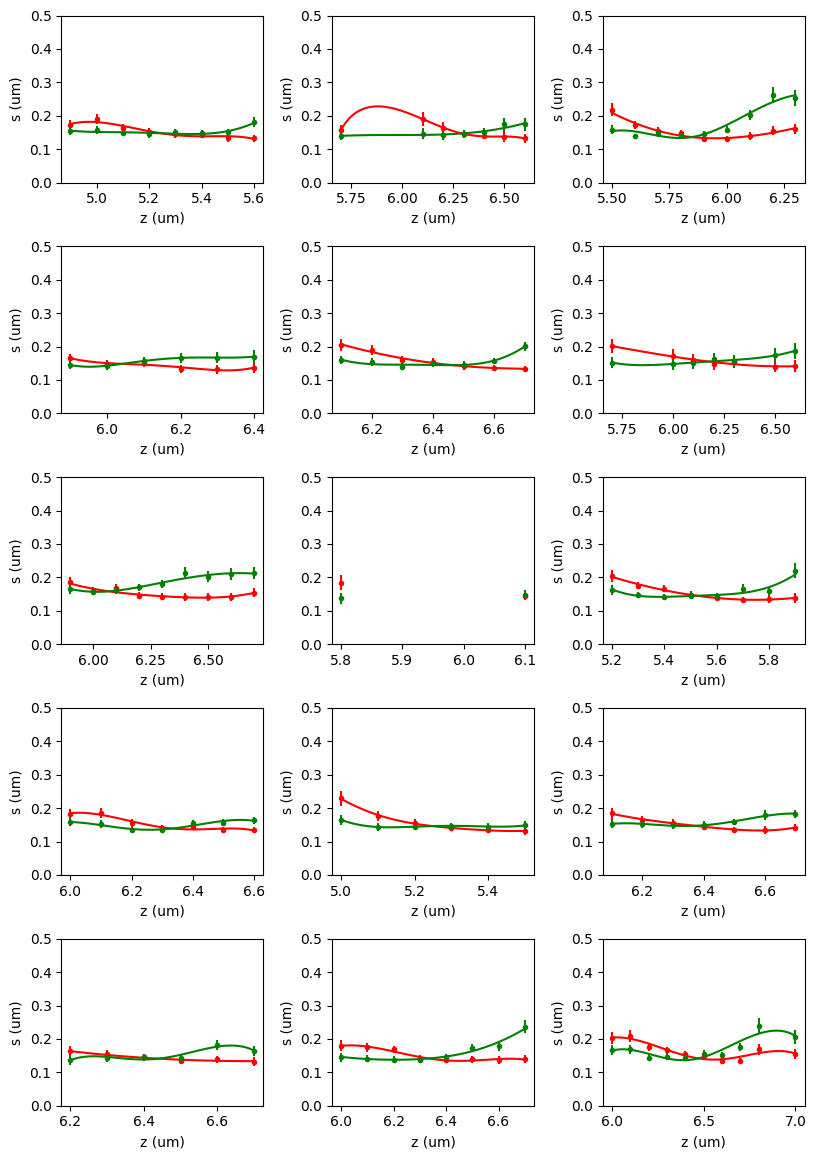

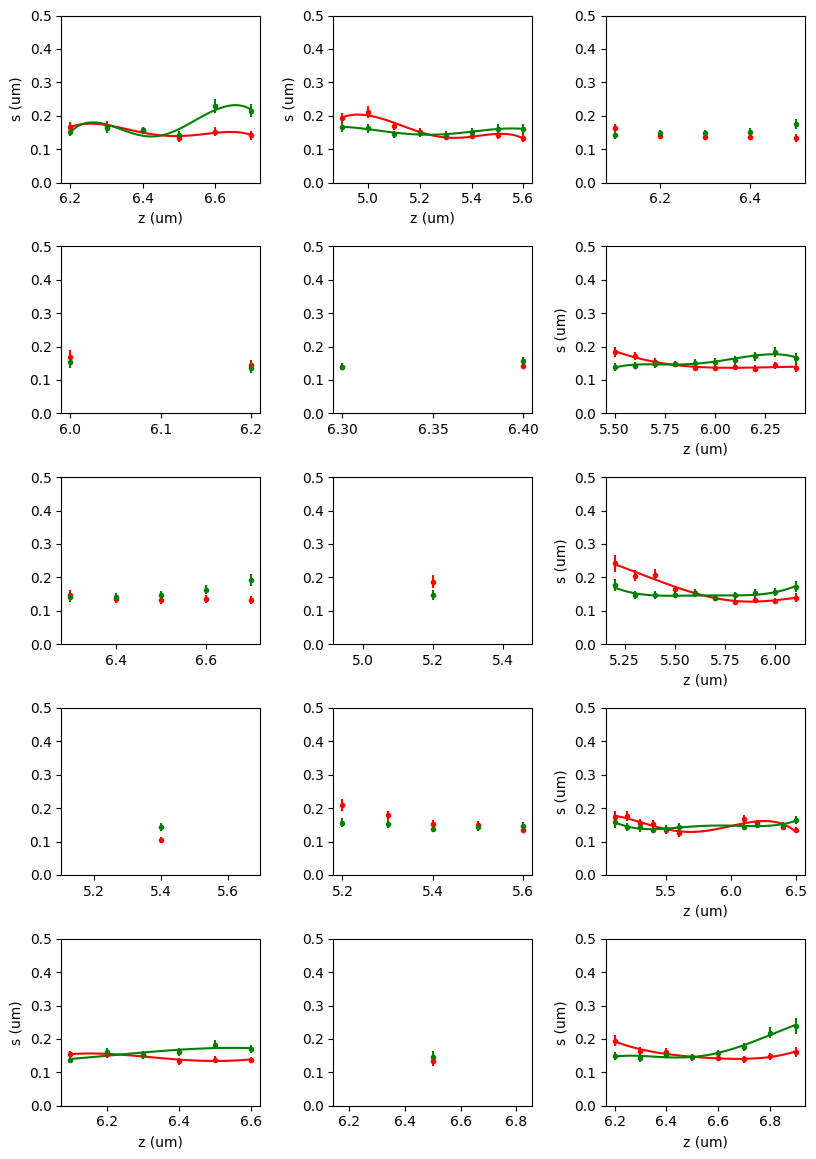

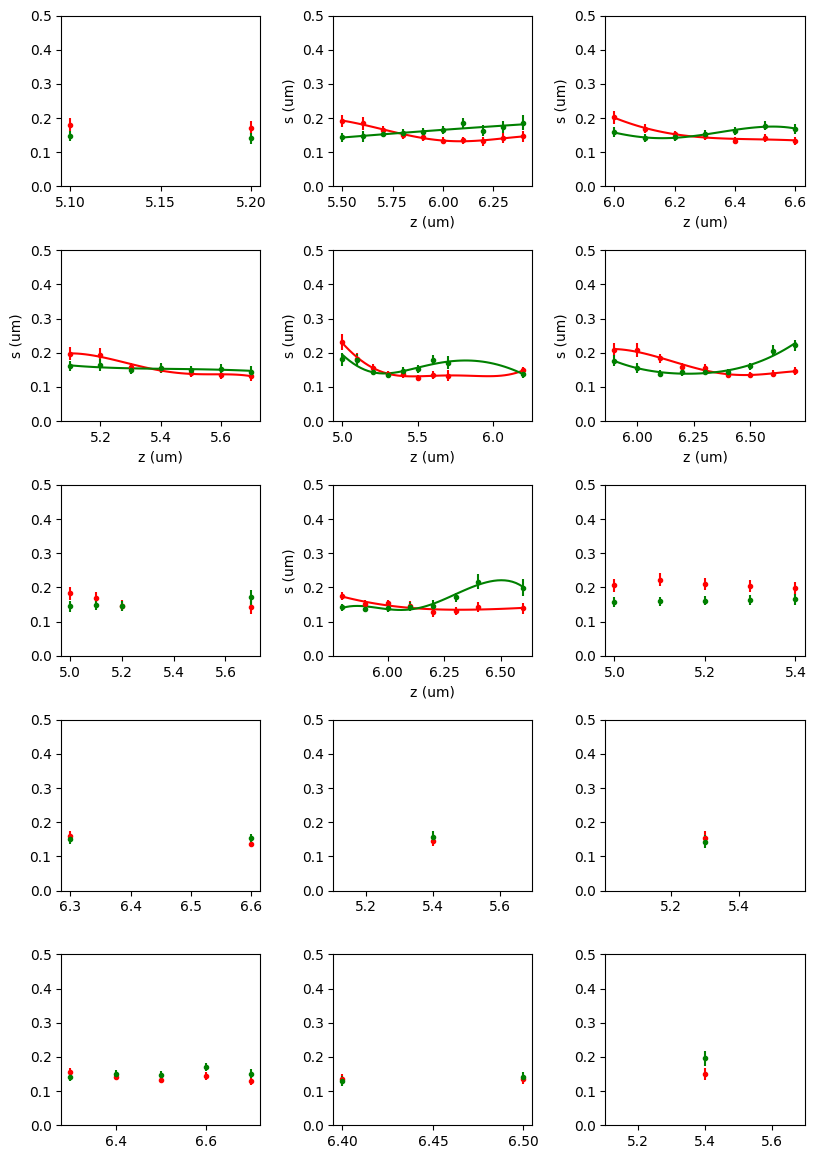

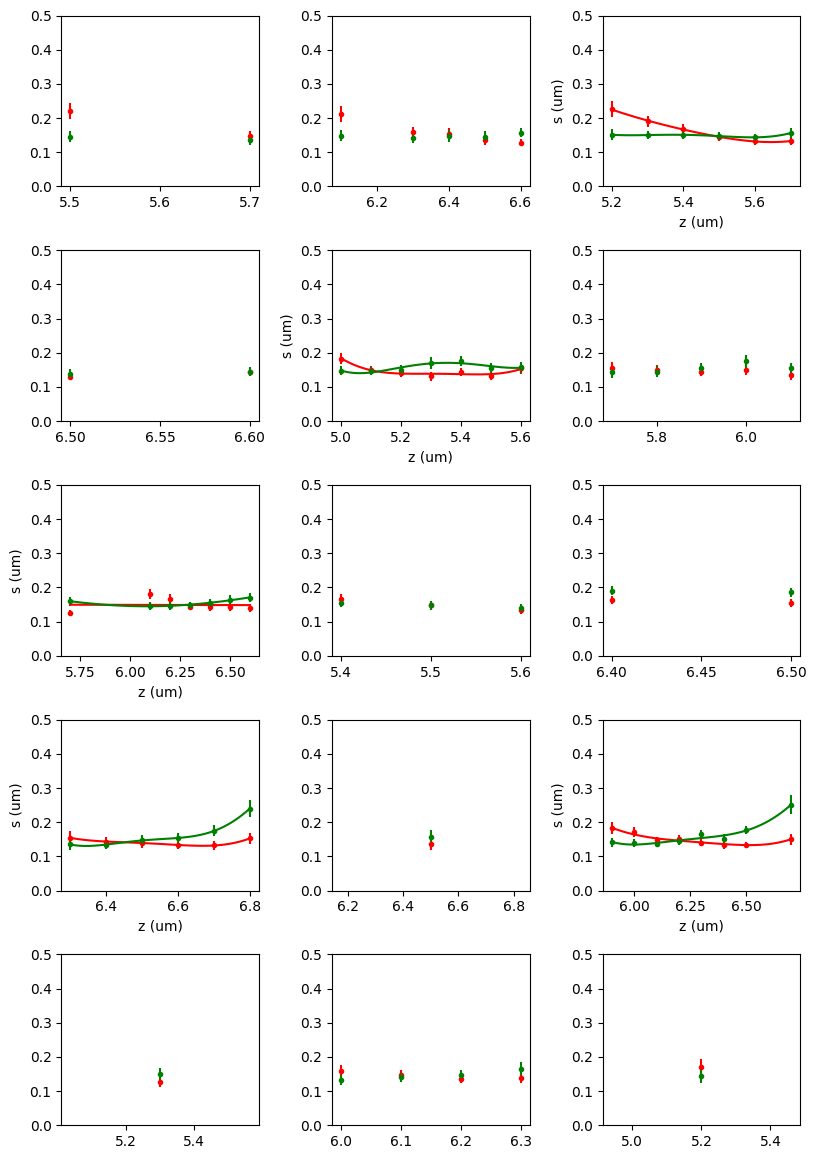

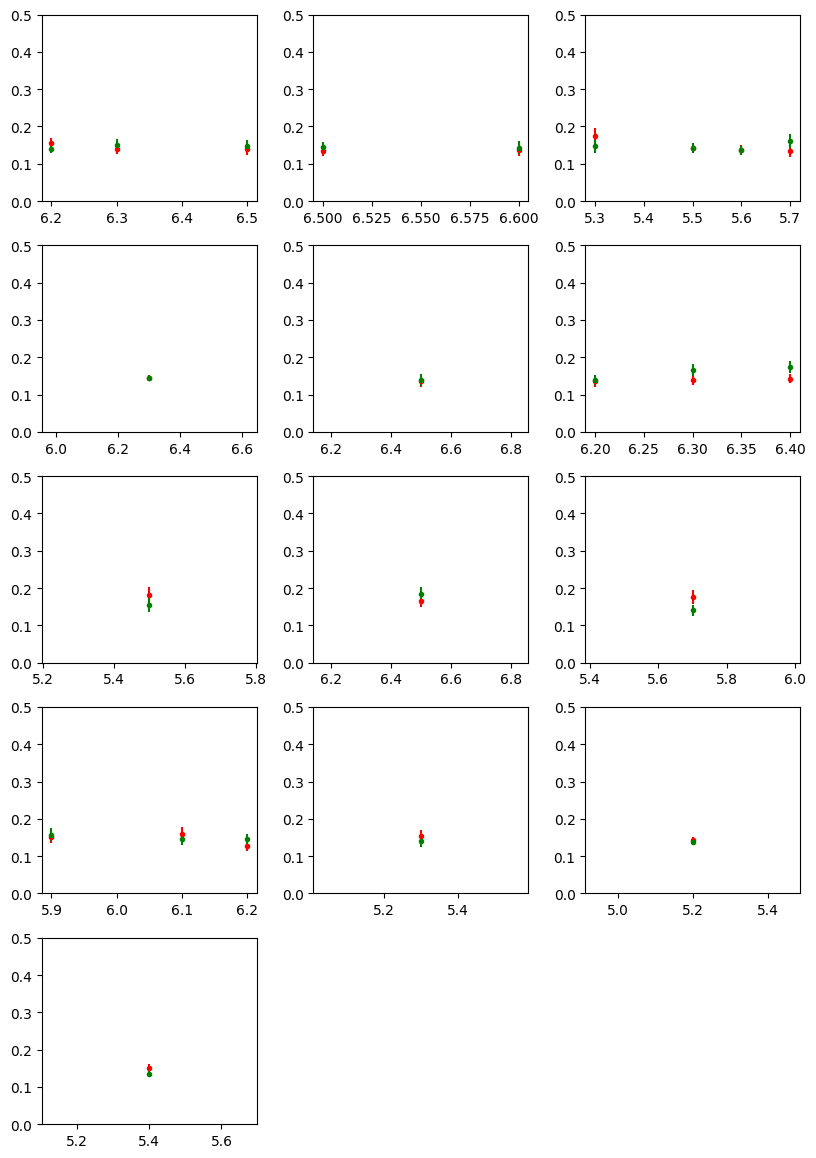

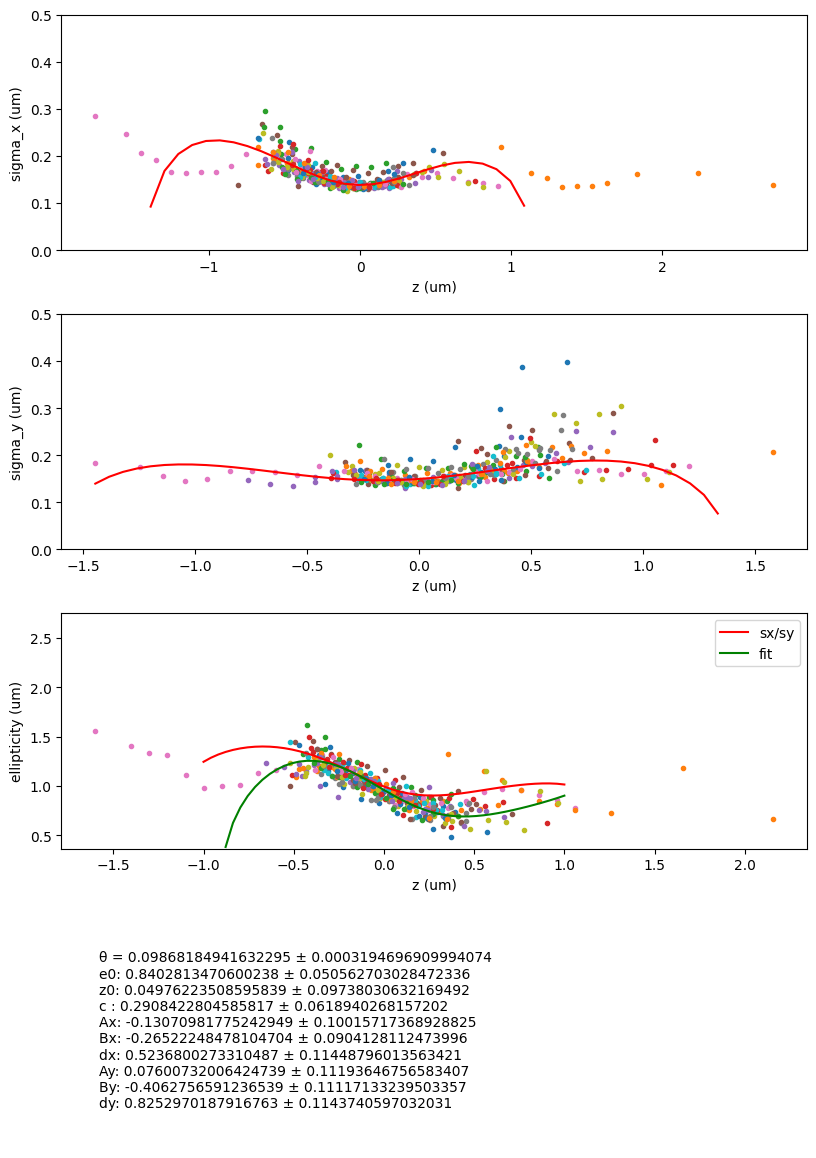

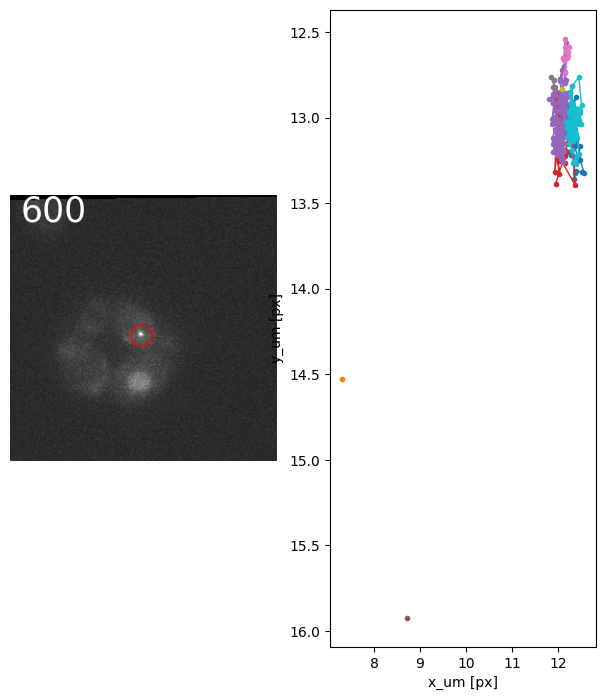

Calculating kymograph:   0%|          | 0/1200 [00:00<?, ?it/s]

Calculating kymograph:   0%|          | 0/1200 [00:00<?, ?it/s]

Loading experimental data:   0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

In [8]:
# using the with .. as: pattern the tracking will be automatically 
# saved at the end in a pickle file which can be read later
with TrackAnalysis(file,
                   channel_main=1,
                   channel_sm=0,
                   path_out='/DATA/lenstra_lab/w.pomp/test/out/protocol',
                   bead_files=('/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_48_40.czi',
                               '/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_49_35.czi',
                               '/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_50_35.czi'),
                   wavelengths=(664, 510),
                   colors=('green', 'red'),                                     
                   ) as track:
    track.save_tracking()  # saves tracking tifs and tsv files (localization tables)
    track.plot()  # saves a trk_results_trace.pdf with the plots that can be seen starting a few
                  # jupyter cells from here

# load track from pickle file
This can be done so the lengthy analysis can be split from the inspection of the analysis.  
Continuing with the track from the analysis above without loading from pickle file is also possible

In [9]:
track = TrackAnalysis.load('/DATA/lenstra_lab/w.pomp/test/out/protocol/YTL639_2020_05_09__12_40_46.pk')

In [10]:
track

TrackAnalysis(image_file=PosixPath('/DATA/lenstra_lab/w.pomp/data/20200509/YTL639_2020_05_09__12_40_46.czi'), channel_label=(), channel_main=(1,), channel_sm=(0,), channel_mask=1, dist_channel=(0, 3), dist_frame=(0, 5), path_out=PosixPath('/DATA/lenstra_lab/w.pomp/test/out/protocol'), mask_method=('square',), bead_files=[PosixPath('/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_48_40.czi'), PosixPath('/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_49_35.czi'), PosixPath('/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_50_35.czi')], wavelengths=(664, 510), colors=('green', 'red'), track3D=True)

In [11]:
track.bead_files

[PosixPath('/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_48_40.czi'),
 PosixPath('/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_49_35.czi'),
 PosixPath('/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_50_35.czi')]

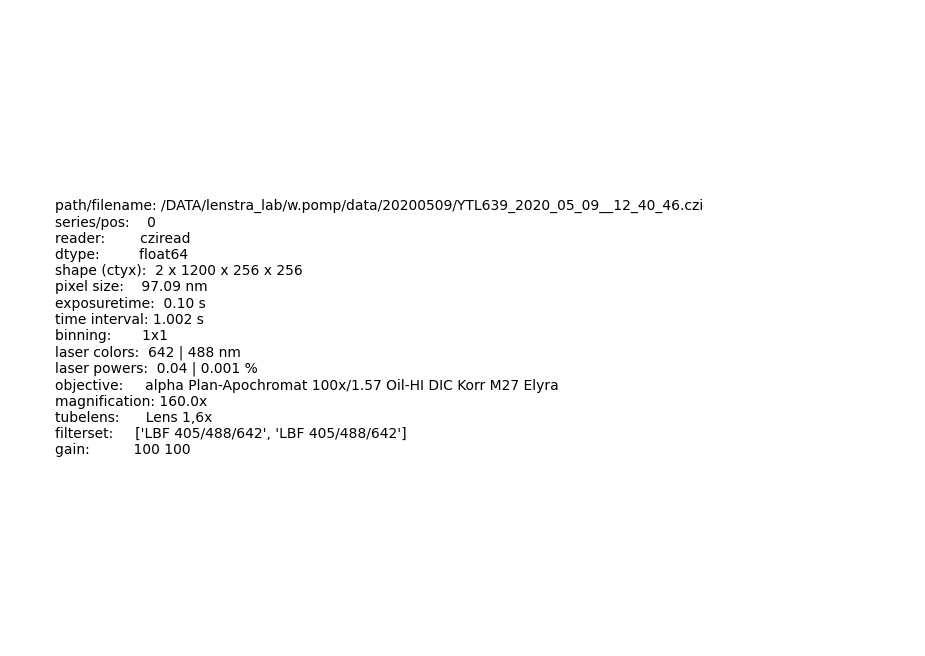

In [12]:
# image file metadata, verify correctness
track.plot_info()

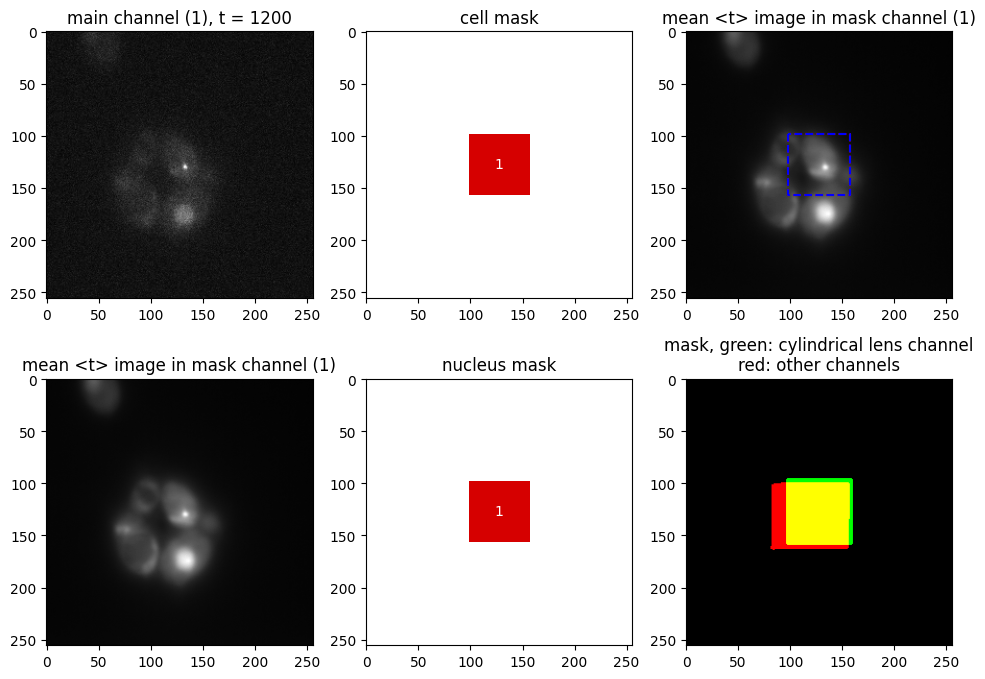

In [13]:
s.plot_mask()

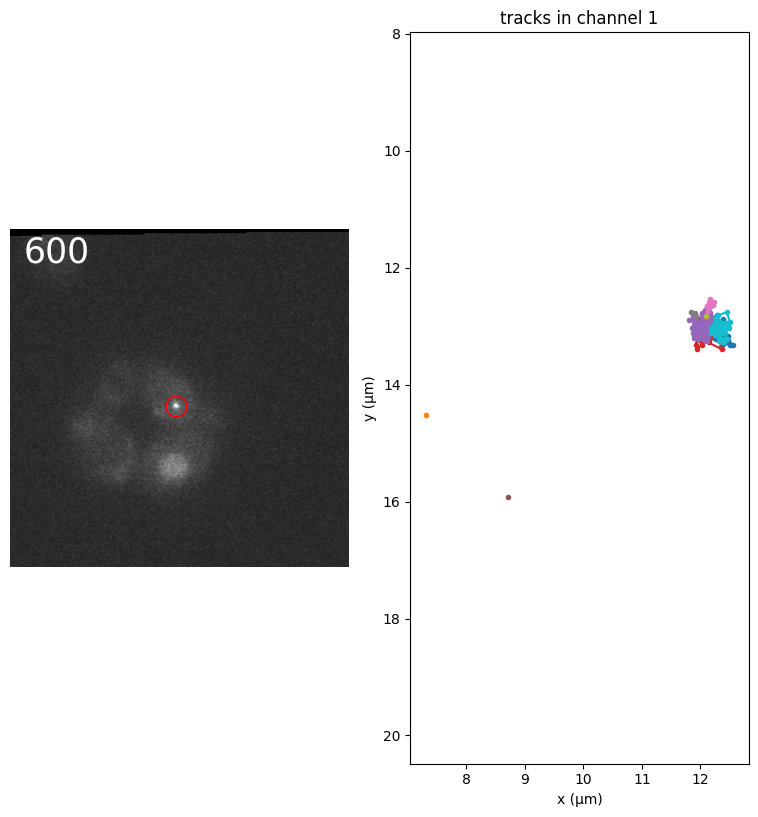

In [14]:
s.plot_localizations()

Calculating kymograph:   0%|          | 0/1200 [00:00<?, ?it/s]

Calculating kymograph:   0%|          | 0/1200 [00:00<?, ?it/s]

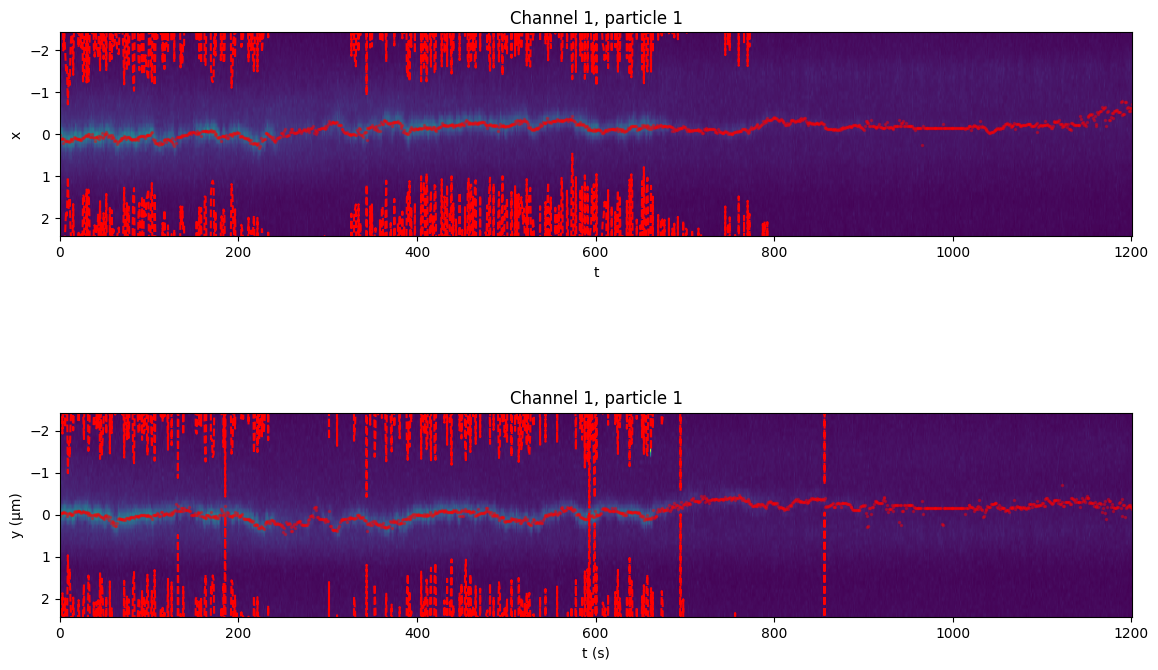

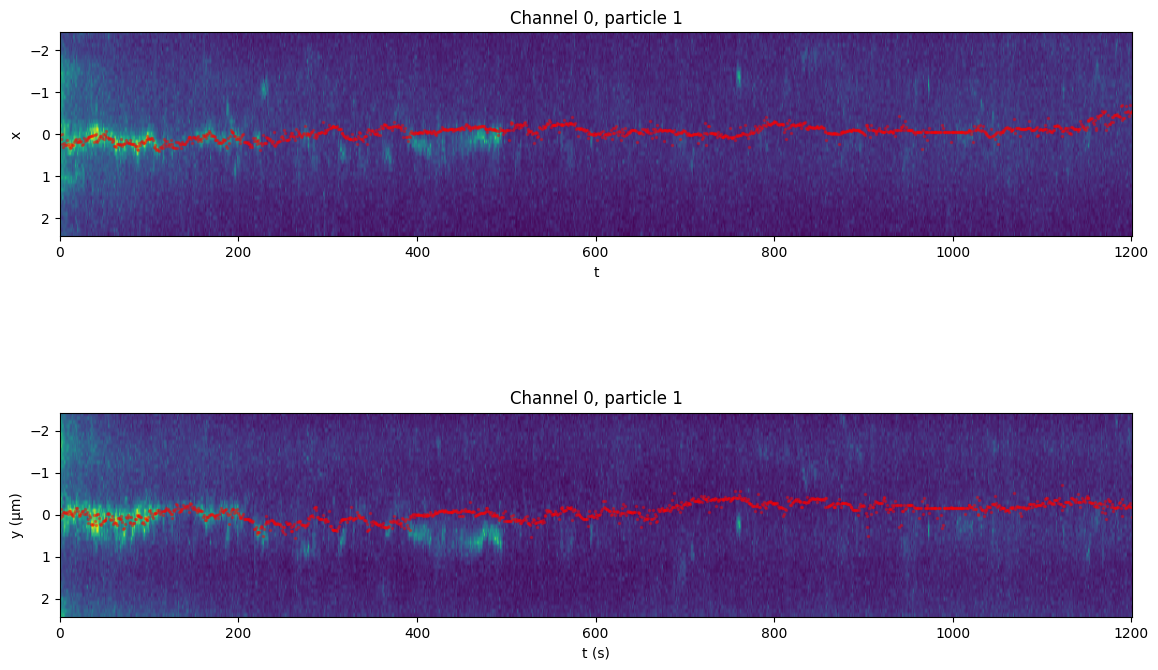

In [15]:
s.plot_kymograph()

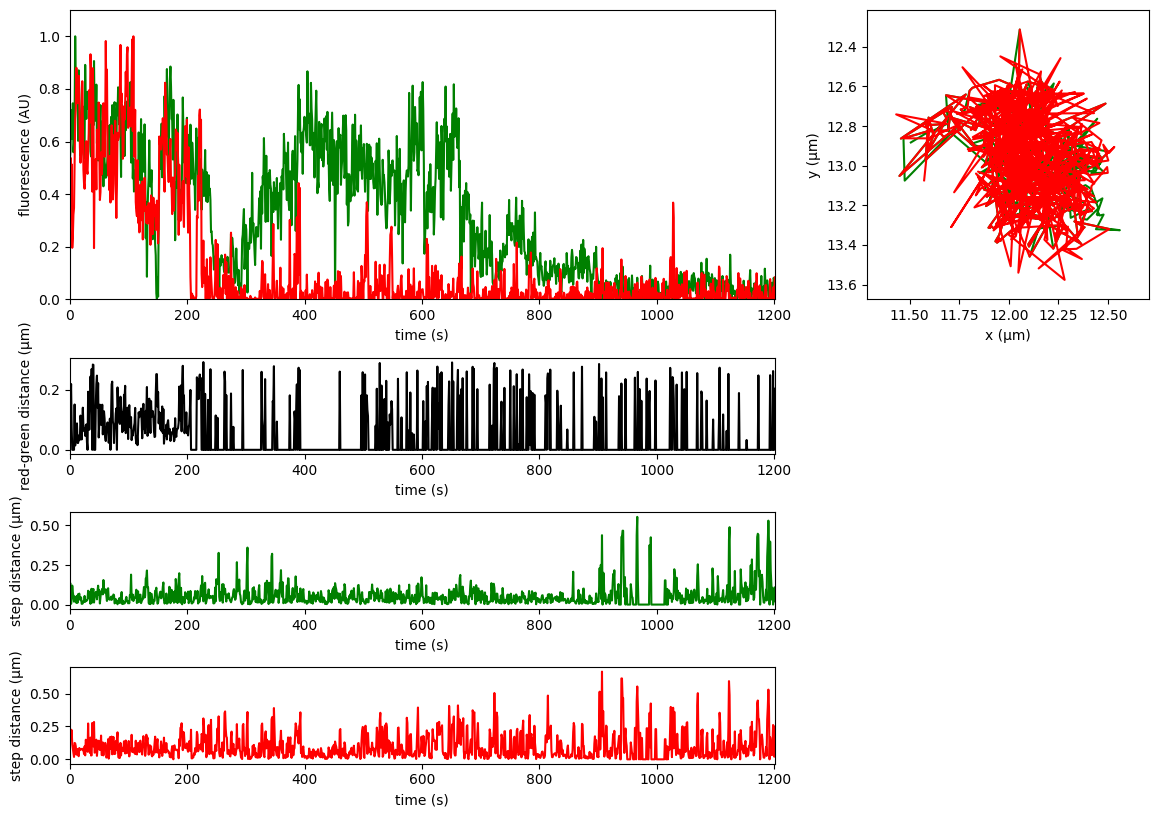

In [16]:
s.plot_traces()

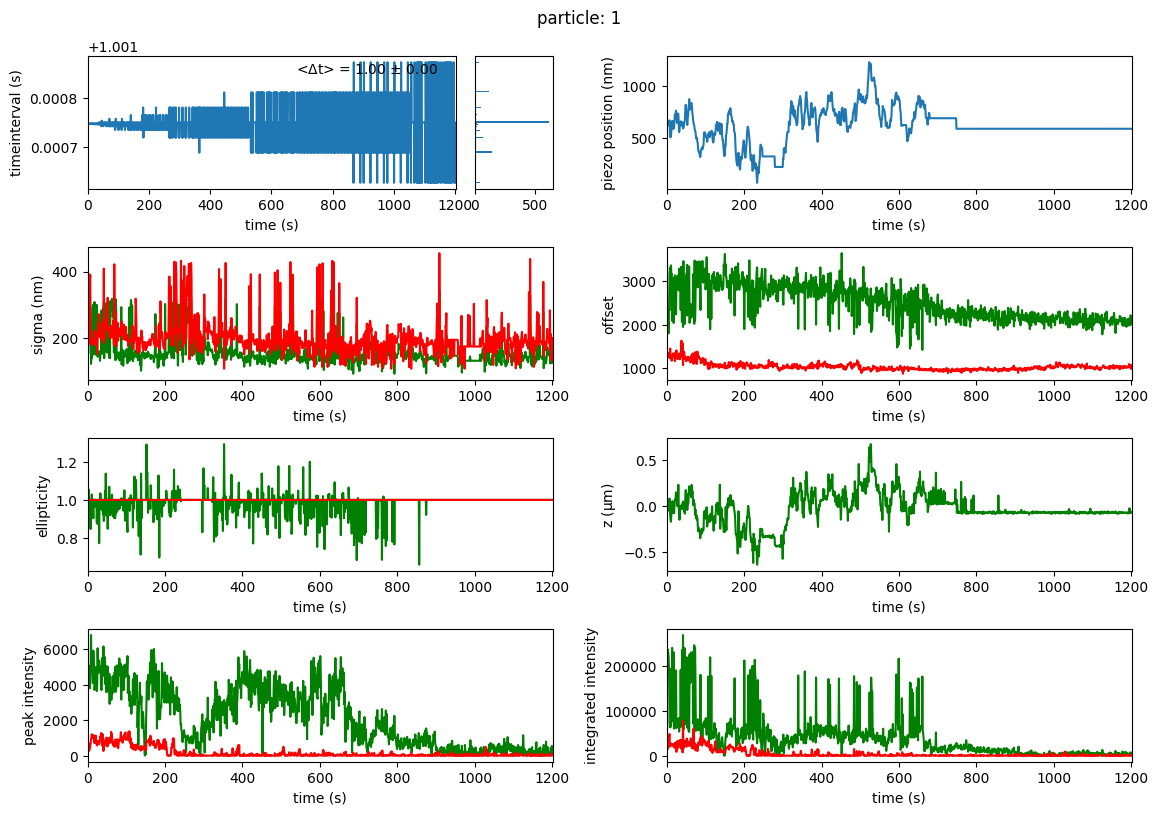

In [17]:
s.plot_traces_extra()

In [18]:
# no label, so no data there
s.loc_label

Empty DataFrame
Columns: [C, R2, T, X2, Z, de, di, di_peak, do, dr, ds, dtheta, dtiltx, dtilty, dx, dy, e, e_ini, i, i_ini, i_peak, o, o_ini, s, s_ini, sn, theta, theta_ini, tiltx, tilty, x, x_ini, y, y_ini, i_a, di_a, o_a, do_a, tiltx_a, dtiltx_a, tilty_a, dtilty_a, i_peak_a, di_peak_a, X2_a, R2_a, sn_a, x_nt, y_nt, z_piezo, z_stage, z_ell, dz_ell, t, z_dell, z_um, dz_um, x_um, dx_um, y_um, dy_um, s_ini_um, x_ini_um, y_ini_um, s_um, ds_um, dr_um, tiltx_um-1, dtiltx_um-1, tilty_um-1, dtilty_um-1, particle, i_peak_uc, di_peak_uc, link]
Index: []

[0 rows x 75 columns]

In [19]:
# all (in this case 1) tracks in the main channel
s.loc_main

C        R2       T             X2    Z        de             di  \
0     1.0  0.817052     0.0  154238.451379  0.0  0.121738   19481.209839   
1     1.0  0.773751     1.0  325435.958177  0.0  0.127732   33645.987292   
2     1.0  0.829083     2.0  340153.719429  0.0  0.101171   34514.487805   
3     1.0  0.772045     3.0  307357.023301  0.0  0.099838  104087.364112   
4     1.0  0.732521     4.0  382934.248206  0.0  0.087474  115848.145279   
...   ...       ...     ...            ...  ...       ...            ...   
1195  1.0  0.114436  1195.0   79785.515743  0.0  0.947773   44733.848339   
1196  1.0  0.169681  1196.0   34655.134757  0.0  1.867245   29585.007283   
1197  1.0  0.272469  1197.0   73688.635873  0.0  0.617394   23238.097969   
1198  1.0  0.285811  1198.0   73717.461680  0.0  0.466072   15241.515959   
1199  1.0  0.129097  1199.0  103133.141968  0.0  1.020460   34616.454021   

          di_peak           do        dr  ...     ds_um     dr_um  \
0     2255.718313   359.856259  0.443752  ...  0.024296  0.043083   
1     3022.449321   612.304334       NaN  ...  0.041320       NaN   
2     3085.671608   628.153546       NaN  ...  0.033018       NaN   
3     2370.357816   589.347846  0.622196  ...  0.134398  0.060407   
4     2721.945468   652.880857  0.711174  ...  0.150023  0.069046   
...           ...          ...       ...  ...       ...       ...   
1195  4220.114551  1166.522926       NaN  ...  0.480288       NaN   
1196  2793.943553   892.753801       NaN  ...  0.932383       NaN   
1197  3066.848961   682.770635       NaN  ...  0.220958       NaN   
1198  1415.293635   285.236093       NaN  ...  0.149236       NaN   
1199  4049.870215  1006.770050       NaN  ...  0.390671       NaN   

       tiltx_um-1  dtiltx_um-1   tilty_um-1  dtilty_um-1  particle  \
0     -163.487549   878.794314    21.211170   862.447531       1.0   
1    -1406.348143  1305.421291   954.165551  1390.755727       1.0   
2     -881.658259  1370.323591  1511.326950  1408.350322       1.0   
3     -327.791970   649.976256   412.003236   619.154890       1.0   
4      -57.640961   711.952676    -2.684999   716.771217       1.0   
...           ...          ...          ...          ...       ...   
1195  -254.838861  2056.977899   231.580594  2462.897981       1.0   
1196  -437.596896  1360.214921   329.566068  1613.315355       1.0   
1197   258.183470  1835.220671  -282.631985  1594.886940       1.0   
1198    15.057982   608.725689   554.667709   601.168410       1.0   
1199   226.303115  2294.091991    49.992533  2465.757749       1.0   

        i_peak_uc   di_peak_uc  link  
0     3146.124468  1904.631642   0.0  
1             NaN          NaN   1.0  
2             NaN          NaN   1.0  
3     4079.590192  2318.723855   0.0  
4     3981.571344  2592.622582   0.0  
...           ...          ...   ...  
1195          NaN          NaN   3.0  
1196          NaN          NaN   3.0  
1197          NaN          NaN   2.0  
1198          NaN          NaN   1.0  
1199          NaN          NaN   1.0  

[1200 rows x 75 columns]

In [20]:
# the brightest track in the main channel
s.loc_main_brightest

C        R2       T             X2    Z        de             di  \
0     1.0  0.817052     0.0  154238.451379  0.0  0.121738   19481.209839   
1     1.0  0.773751     1.0  325435.958177  0.0  0.127732   33645.987292   
2     1.0  0.829083     2.0  340153.719429  0.0  0.101171   34514.487805   
3     1.0  0.772045     3.0  307357.023301  0.0  0.099838  104087.364112   
4     1.0  0.732521     4.0  382934.248206  0.0  0.087474  115848.145279   
...   ...       ...     ...            ...  ...       ...            ...   
1195  1.0  0.114436  1195.0   79785.515743  0.0  0.947773   44733.848339   
1196  1.0  0.169681  1196.0   34655.134757  0.0  1.867245   29585.007283   
1197  1.0  0.272469  1197.0   73688.635873  0.0  0.617394   23238.097969   
1198  1.0  0.285811  1198.0   73717.461680  0.0  0.466072   15241.515959   
1199  1.0  0.129097  1199.0  103133.141968  0.0  1.020460   34616.454021   

          di_peak           do        dr  ...     ds_um     dr_um  \
0     2255.718313   359.856259  0.443752  ...  0.024296  0.043083   
1     3022.449321   612.304334       NaN  ...  0.041320       NaN   
2     3085.671608   628.153546       NaN  ...  0.033018       NaN   
3     2370.357816   589.347846  0.622196  ...  0.134398  0.060407   
4     2721.945468   652.880857  0.711174  ...  0.150023  0.069046   
...           ...          ...       ...  ...       ...       ...   
1195  4220.114551  1166.522926       NaN  ...  0.480288       NaN   
1196  2793.943553   892.753801       NaN  ...  0.932383       NaN   
1197  3066.848961   682.770635       NaN  ...  0.220958       NaN   
1198  1415.293635   285.236093       NaN  ...  0.149236       NaN   
1199  4049.870215  1006.770050       NaN  ...  0.390671       NaN   

       tiltx_um-1  dtiltx_um-1   tilty_um-1  dtilty_um-1  particle  \
0     -163.487549   878.794314    21.211170   862.447531       1.0   
1    -1406.348143  1305.421291   954.165551  1390.755727       1.0   
2     -881.658259  1370.323591  1511.326950  1408.350322       1.0   
3     -327.791970   649.976256   412.003236   619.154890       1.0   
4      -57.640961   711.952676    -2.684999   716.771217       1.0   
...           ...          ...          ...          ...       ...   
1195  -254.838861  2056.977899   231.580594  2462.897981       1.0   
1196  -437.596896  1360.214921   329.566068  1613.315355       1.0   
1197   258.183470  1835.220671  -282.631985  1594.886940       1.0   
1198    15.057982   608.725689   554.667709   601.168410       1.0   
1199   226.303115  2294.091991    49.992533  2465.757749       1.0   

        i_peak_uc   di_peak_uc  link  
0     3146.124468  1904.631642   0.0  
1             NaN          NaN   1.0  
2             NaN          NaN   1.0  
3     4079.590192  2318.723855   0.0  
4     3981.571344  2592.622582   0.0  
...           ...          ...   ...  
1195          NaN          NaN   3.0  
1196          NaN          NaN   3.0  
1197          NaN          NaN   2.0  
1198          NaN          NaN   1.0  
1199          NaN          NaN   1.0  

[1200 rows x 75 columns]

In [21]:
# the single molecule data associated with the brightest track in the main channel
s.loc_sm_brightest

C        R2       T            X2    Z         de            di  \
1200  0.0  0.339746     0.0  46041.947922  0.0   0.256167  20830.467263   
1201  0.0  0.413284     1.0  56153.987631  0.0   0.192253  21086.136532   
1202  0.0  0.240923     2.0  46794.664609  0.0   0.277054  22342.309034   
1203  0.0  0.473872     3.0  36005.649886  0.0   0.212299  22055.842561   
1204  0.0  0.316376     4.0  53573.279069  0.0   0.285447  51028.559937   
...   ...       ...     ...           ...  ...        ...           ...   
2395  0.0  0.058335  1195.0  11442.463068  0.0  10.442746  15307.299029   
2396  0.0  0.035903  1196.0  24399.284743  0.0   3.605819  18712.528815   
2397  0.0  0.035490  1197.0   9037.072195  0.0   1.162960   7219.185739   
2398  0.0  0.010458  1198.0  14930.709206  0.0  25.532893  22065.442542   
2399  0.0  0.064448  1199.0  15844.406787  0.0   0.898022  10720.584435   

          di_peak          do  dr  ...      ds_um  dr_um  tiltx_um-1  \
1200   913.243958  197.964286 NaN  ...   0.130423    NaN   28.672601   
1201   975.290211  208.261595 NaN  ...   0.093060    NaN   94.595069   
1202   945.244748  209.486062 NaN  ...   0.150330    NaN   78.421726   
1203  1328.684642  324.351379 NaN  ...   0.109430    NaN -114.079645   
1204   650.891805  174.400330 NaN  ...   0.303803    NaN -301.708214   
...           ...         ...  ..  ...        ...    ...         ...   
2395   825.854112  607.370089 NaN  ...   5.921568    NaN  -43.370308   
2396  2089.859516  473.504862 NaN  ...   1.587974    NaN  -40.017662   
2397   548.435240  124.800295 NaN  ...   0.456225    NaN   47.851223   
2398  1055.261857  771.649841 NaN  ...  16.963936    NaN   50.200795   
2399   762.800179  170.934614 NaN  ...   0.367149    NaN   57.103634   

      dtiltx_um-1  tilty_um-1  dtilty_um-1  particle  i_peak_uc  di_peak_uc  \
1200   313.008204 -268.302056   318.119214       1.0        NaN         NaN   
1201   334.667054  -85.419538   345.480387       1.0        NaN         NaN   
1202   331.466652  -80.608302   325.276002       1.0        NaN         NaN   
1203   554.486547   19.926532   559.362759       1.0        NaN         NaN   
1204   131.177138  133.366728   133.915125       1.0        NaN         NaN   
...           ...         ...          ...       ...        ...         ...   
2395   348.699242 -122.791018   337.625908       1.0        NaN         NaN   
2396  1156.623643  151.513226  1238.608834       1.0        NaN         NaN   
2397   246.439381   -5.018829   234.506065       1.0        NaN         NaN   
2398   450.889116   43.386842   395.209320       1.0        NaN         NaN   
2399   325.415881   21.680738   345.577349       1.0        NaN         NaN   

      link  
1200   0.0  
1201   1.0  
1202   1.0  
1203   0.0  
1204   0.0  
...    ...  
2395   3.0  
2396   3.0  
2397   2.0  
2398   1.0  
2399   1.0  

[1200 rows x 75 columns]

In [22]:
# selecting some interesting columns
s.loc_main_brightest[['t', 'i', 'i_peak', 'x_um', 'y_um', 'z_um']]

t              i       i_peak       x_um       y_um      z_um
0        0.000000   45255.077443  3639.621347  12.240644  13.041276 -0.096449
1        1.001747   58981.332131  3834.333733  12.349895  12.968890 -0.006119
2        2.003495   75222.813679  4883.532737  12.354446  12.969140 -0.010119
3        3.005243  236202.713344  4156.262910  12.315005  12.980769 -0.048761
4        4.006990  229296.298677  4155.346097  12.431974  12.954305  0.043346
...           ...            ...          ...        ...        ...       ...
1195  1197.088250    5089.040151   380.180189  11.689069  12.788826 -0.056119
1196  1198.090000    1738.619483   129.884745  11.689069  12.788826 -0.066119
1197  1199.091750    5579.552206   556.808028  11.618506  12.823601 -0.069119
1198  1200.093500    7302.934716   490.058491  11.598754  12.827197 -0.067119
1199  1201.095125    4642.172515   421.048212  11.506269  12.882911 -0.061119

[1200 rows x 6 columns]

In [23]:
# selecting some interesting columns
s.loc_sm_brightest[['t', 'i', 'i_peak', 'x_um', 'y_um', 'z_um']]

t             i      i_peak       x_um       y_um  z_um
1200     0.000000  15319.691618  500.426125  12.143733  13.081833   NaN
1201     1.001747  21512.583672  736.892494  12.242301  12.879186   NaN
1202     2.003495  14366.712634  454.526304  12.138770  13.003246   NaN
1203     3.005243  15218.816023  702.751633  12.358149  13.040168   NaN
1204     4.006990  27422.801670  268.585591  12.431974  12.954305   NaN
...           ...           ...         ...        ...        ...   ...
2395  1197.088250    195.004837    8.216984  11.689069  12.788826   NaN
2396  1198.090000    624.302664   54.270372  11.432253  12.741151   NaN
2397  1199.091750   1170.717494   65.897916  11.618506  12.823601   NaN
2398  1200.093500    100.000000    3.784983  11.598754  12.827197   NaN
2399  1201.095125   2160.689887  115.268877  11.573304  13.074172   NaN

[1200 rows x 6 columns]